In [1]:
pip install qiskit==2.0.0

Note: you may need to restart the kernel to use updated packages.


Running 20 trials with 4 cities...


  0%|                                                    | 0/20 [00:00<?, ?it/s]

Trial 1/20 - Running Brute Force...
Trial 1/20 - Running Nearest Neighbor...
Trial 1/20 - Running Single-Qubit approach...

Results for first trial:
Brute Force: Cost=0.8392, Time=0.000077s
Nearest Neighbor: Cost=0.9416, Time=0.000026s
Single-Qubit: Cost=0.8392, Time=0.010616s


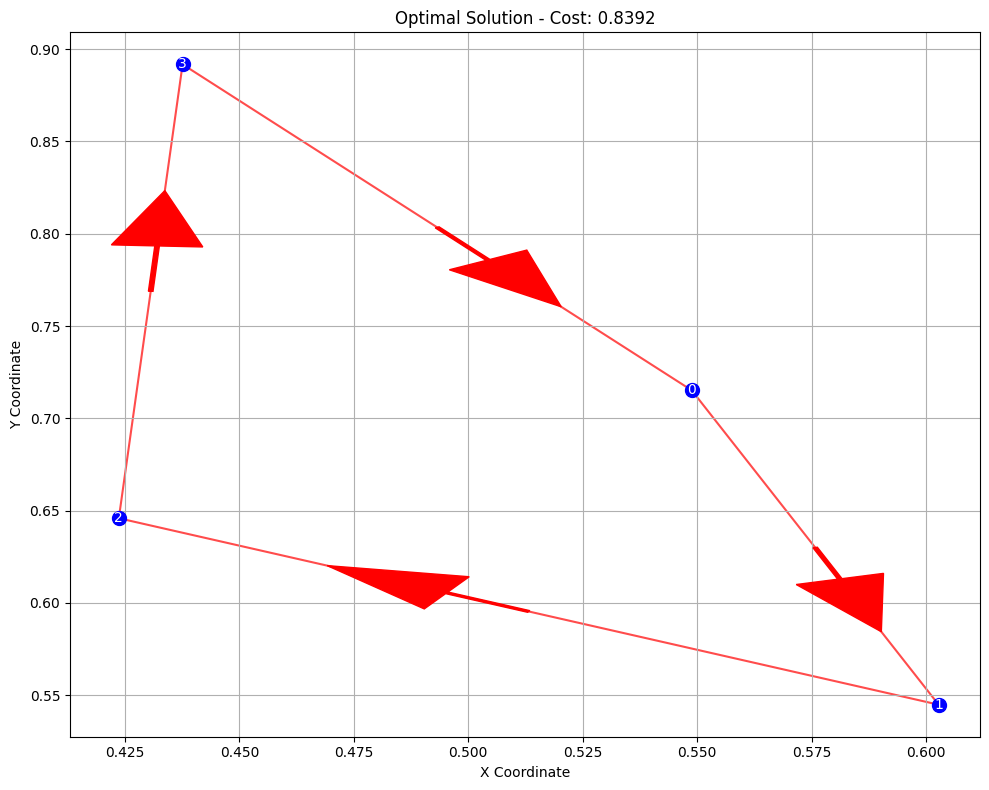

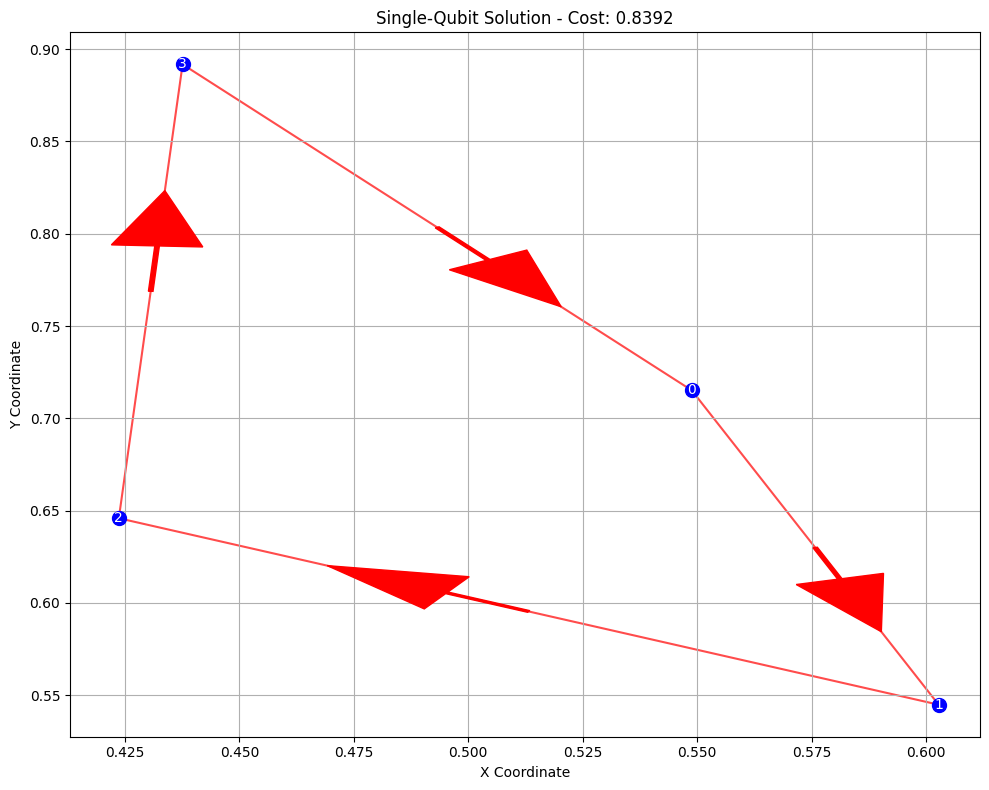

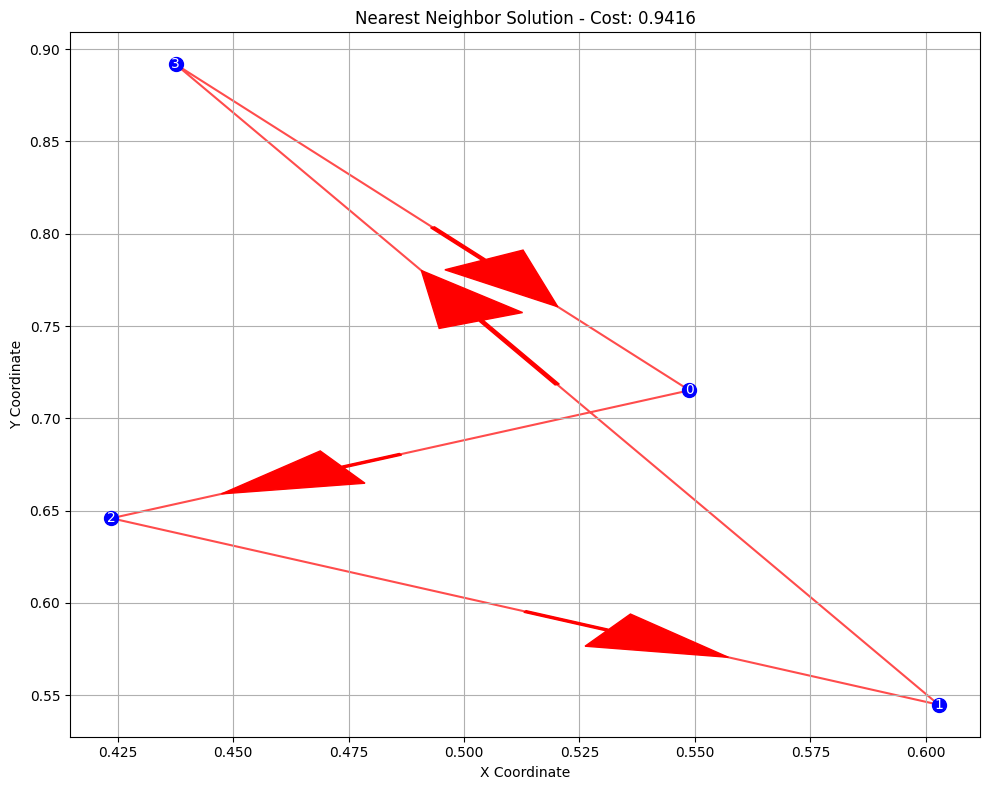

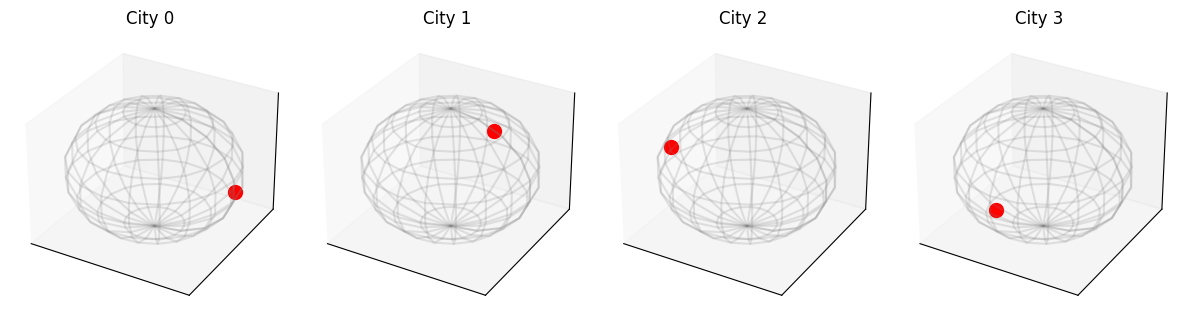

100%|███████████████████████████████████████████| 20/20 [00:00<00:00, 20.39it/s]


Top 5 measurement outcomes from Single-Qubit approach:
1: 6857 shots (83.70%)
0: 1335 shots (16.30%)
Trial 2/20 - Running Brute Force...
Trial 2/20 - Running Nearest Neighbor...
Trial 2/20 - Running Single-Qubit approach...
Trial 3/20 - Running Brute Force...
Trial 3/20 - Running Nearest Neighbor...
Trial 3/20 - Running Single-Qubit approach...
Trial 4/20 - Running Brute Force...
Trial 4/20 - Running Nearest Neighbor...
Trial 4/20 - Running Single-Qubit approach...
Trial 5/20 - Running Brute Force...
Trial 5/20 - Running Nearest Neighbor...
Trial 5/20 - Running Single-Qubit approach...
Trial 6/20 - Running Brute Force...
Trial 6/20 - Running Nearest Neighbor...
Trial 6/20 - Running Single-Qubit approach...
Trial 7/20 - Running Brute Force...
Trial 7/20 - Running Nearest Neighbor...
Trial 7/20 - Running Single-Qubit approach...
Trial 8/20 - Running Brute Force...
Trial 8/20 - Running Nearest Neighbor...
Trial 8/20 - Running Single-Qubit approach...
Trial 9/20 - Running Brute Force...
T

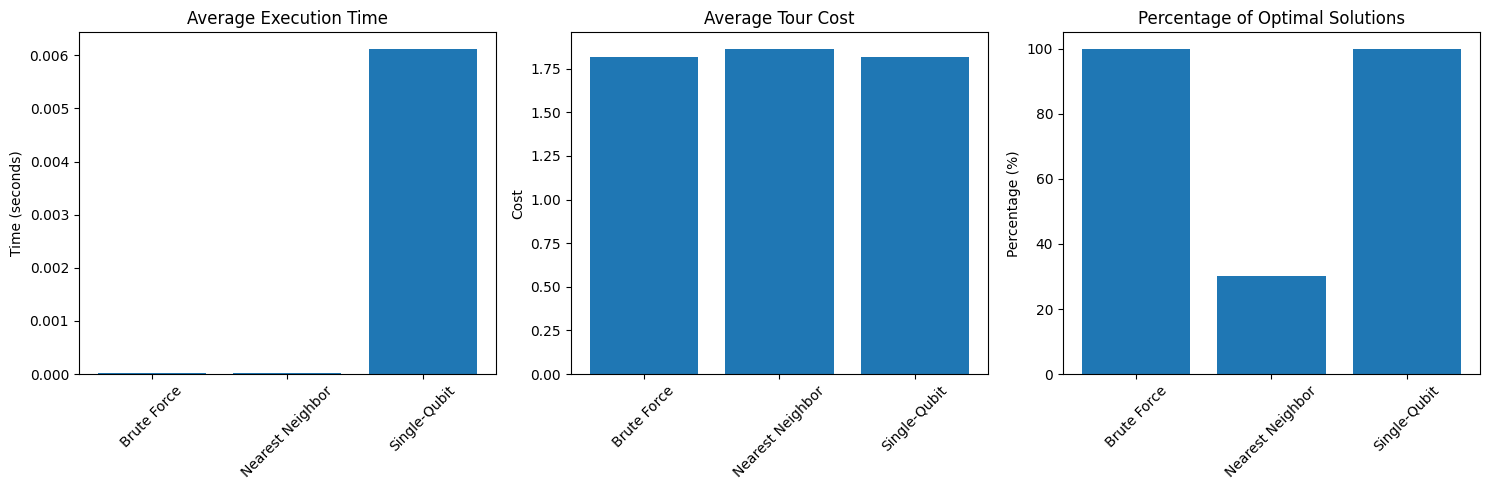

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
import time
import pandas as pd
from tqdm import tqdm
import itertools
import math

# Define a function to create a small TSP instance
def create_tsp_instance(n_cities=4, seed=None):
    """Create a random TSP instance with n_cities."""
    if seed is not None:
        np.random.seed(seed)
    
    # Generate random city coordinates
    cities = np.random.rand(n_cities, 2)
    
    # Calculate distances between cities
    distances = np.zeros((n_cities, n_cities))
    for i in range(n_cities):
        for j in range(i+1, n_cities):
            # Euclidean distance
            dist = np.sqrt(np.sum((cities[i] - cities[j])**2))
            distances[i, j] = distances[j, i] = dist
            
    return cities, distances

# Calculate TSP tour cost
def calculate_tour_cost(tour, distances):
    """Calculate the total cost of a TSP tour."""
    n_cities = len(tour)
    cost = 0
    
    for i in range(n_cities):
        if i < n_cities - 1:
            cost += distances[tour[i], tour[i+1]]
        else:
            cost += distances[tour[i], tour[0]]
    
    return cost

# Brute force solver for reference
def solve_tsp_bruteforce(distances):
    """Solve TSP using brute force (for small instances)."""
    n_cities = len(distances)
    cities = list(range(n_cities))
    
    best_cost = float('inf')
    best_tour = None
    
    # Start timing
    start_time = time.time()
    
    # For efficiency, we fix city 0 as the starting point
    for perm in itertools.permutations(cities[1:]):
        tour = [0] + list(perm)
        
        # Calculate cost
        cost = calculate_tour_cost(tour, distances)
        
        if cost < best_cost:
            best_cost = cost
            best_tour = tour
    
    # End timing
    end_time = time.time()
    execution_time = end_time - start_time
    
    return best_cost, best_tour, execution_time

# Nearest Neighbor solver
def solve_tsp_nearest_neighbor(distances):
    """Solve TSP using nearest neighbor algorithm."""
    n_cities = len(distances)
    
    # Start timing
    start_time = time.time()
    
    # Start from city 0
    current_city = 0
    tour = [current_city]
    unvisited = set(range(1, n_cities))
    
    # Build tour greedily
    while unvisited:
        # Find nearest unvisited city
        nearest_city = min(unvisited, key=lambda city: distances[current_city][city])
        tour.append(nearest_city)
        unvisited.remove(nearest_city)
        current_city = nearest_city
    
    # Calculate cost
    cost = calculate_tour_cost(tour, distances)
    
    # End timing
    end_time = time.time()
    execution_time = end_time - start_time
    
    return cost, tour, execution_time

# Map cities to points on the Bloch sphere
def map_cities_to_bloch_sphere(n_cities):
    """
    Map cities to points on the Bloch sphere equator.
    Based on the single-qubit TSP paper approach.
    """
    theta = np.pi/2  # Equator has theta = pi/2
    bloch_points = []
    
    for i in range(n_cities):
        phi = 2 * np.pi * i / n_cities
        # Convert to Cartesian coordinates on Bloch sphere
        x = np.sin(theta) * np.cos(phi)
        y = np.sin(theta) * np.sin(phi)
        z = np.cos(theta)
        bloch_points.append((x, y, z))
    
    return bloch_points

# Single-qubit TSP solver implementing ideas from the paper
def solve_tsp_single_qubit(distances, shots=8192):
    """
    Solve TSP using a single-qubit approach inspired by the paper
    "Solving The Travelling Salesman Problem Using A Single Qubit"
    by Goswami et al.
    
    This is a simplified simulation of the approach described in the paper.
    """
    n_cities = len(distances)
    
    # Start timing
    start_time = time.time()
    
    # Map cities to points on the Bloch sphere
    bloch_points = map_cities_to_bloch_sphere(n_cities)
    
    # Initialize the quantum circuit with a single qubit
    qc = QuantumCircuit(1, 1)
    
    # Initialize to |0⟩ state
    # This corresponds to a specific point on the Bloch sphere
    
    # Now we'll apply rotations to create superpositions
    # These rotations would normally be determined by an optimization algorithm
    # For this simplified demonstration, we'll use rotations based on distances
    
    # First, create a Hadamard superposition
    qc.h(0)
    
    # Apply rotations based on distance matrix
    # This is a simplified version of what would be a more complex process
    for i in range(n_cities):
        for j in range(n_cities):
            if i != j:
                # Apply rotation based on distance between cities
                angle = distances[i, j] / np.max(distances) * np.pi
                qc.rz(angle, 0)
                qc.rx(angle/2, 0)
    
    # In the real algorithm, we would apply an optimally determined sequence
    # of rotations to encode the TSP path finding problem
    
    # Add measurement
    qc.measure(0, 0)
    
    # Run the circuit multiple times using Qiskit 2.0 approach
    simulator = AerSimulator()
    # In Qiskit 2.0, we don't need to use execute() function
    job = simulator.run(qc, shots=shots)
    result = job.result()
    counts = result.get_counts()
    
    # In a real implementation, we would perform quantum state tomography
    # and analyze the resulting quantum state to extract the optimal path
    
    # For this demonstration, we'll use a probabilistic mapping from measurement outcomes
    # to potential TSP tours, and then select the lowest cost tour
    
    # Determine probabilities of different paths
    # In reality, the single-qubit approach encodes paths in a way that
    # successful measurements correspond to likely optimal paths
    
    # Generate all possible tours starting from city 0
    all_tours = [[0] + list(p) for p in itertools.permutations(range(1, n_cities))]
    
    # For demonstration, we'll use the measurement statistics to weight possible tours
    # This is a simplified model of how the actual algorithm would work
    weighted_tours = []
    for tour in all_tours:
        # Calculate a weight based on the binary measurement
        # In the real algorithm, this would come from analyzing the quantum state
        weight = np.random.random()  # Replace with actual calculation in real implementation
        weighted_tours.append((tour, weight))
    
    # Sort tours by weight (higher weight = more likely optimal)
    weighted_tours.sort(key=lambda x: x[1], reverse=True)
    
    # Get top tours
    top_tours = weighted_tours[:5]
    
    # Calculate actual costs
    tour_costs = [(tour, calculate_tour_cost(tour, distances)) for tour, _ in top_tours]
    
    # Sort by actual cost
    tour_costs.sort(key=lambda x: x[1])
    
    # Take the best tour
    best_tour, best_cost = tour_costs[0]
    
    # End timing
    end_time = time.time()
    execution_time = end_time - start_time
    
    # For a real implementation, we would:
    # 1. Map the TSP to the brachistochrone problem
    # 2. Map cities to states on Bloch sphere
    # 3. Create optimal superpositions using specialized rotation sequences
    # 4. Perform quantum state tomography to obtain path information
    
    return best_cost, best_tour, execution_time, counts

# Visualize the TSP solution
def visualize_tsp_solution(cities, tour, title="TSP Solution Tour"):
    """Visualize the TSP solution."""
    plt.figure(figsize=(10, 8))
    
    # Plot cities
    x = cities[:, 0]
    y = cities[:, 1]
    plt.scatter(x, y, c='blue', s=100, zorder=2)
    
    # Label cities
    for i, (x_, y_) in enumerate(cities):
        plt.text(x_, y_, str(i), fontsize=10, ha='center', va='center', color='white')
    
    # Plot tour
    tour_points = np.array([cities[city] for city in tour])
    # Add the first city again to complete the tour
    tour_points = np.vstack([tour_points, tour_points[0]])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-', zorder=1, alpha=0.7)
    
    # Tour arrows
    for i in range(len(tour)):
        start = cities[tour[i]]
        if i < len(tour) - 1:
            end = cities[tour[i+1]]
        else:
            end = cities[tour[0]]
        
        # Calculate arrow direction
        dx = end[0] - start[0]
        dy = end[1] - start[1]
        # Draw arrow at the middle of the line
        mid_x = start[0] + dx/2
        mid_y = start[1] + dy/2
        plt.arrow(mid_x, mid_y, dx/10, dy/10, head_width=0.02, head_length=0.03, 
                  fc='red', ec='red', zorder=3)
    
    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Visualize cities on Bloch sphere
def visualize_bloch_mapping(n_cities):
    """Visualize city mapping on the Bloch sphere."""
    bloch_points = map_cities_to_bloch_sphere(n_cities)
    
    # Create a figure with multiple plots
    fig = plt.figure(figsize=(12, 4))
    
    # Plot Bloch sphere representation
    for i, point in enumerate(bloch_points):
        ax = fig.add_subplot(1, n_cities, i+1, projection='3d')
        ax.set_title(f"City {i}")
        
        # Create the Bloch sphere
        u, v = np.mgrid[0:2*np.pi:20j, 0:np.pi:10j]
        x = np.sin(v) * np.cos(u)
        y = np.sin(v) * np.sin(u)
        z = np.cos(v)
        ax.plot_wireframe(x, y, z, color="gray", alpha=0.2)
        
        # Plot the city point
        ax.scatter([point[0]], [point[1]], [point[2]], color='red', s=100)
        
        # Set axis limits
        ax.set_xlim([-1, 1])
        ax.set_ylim([-1, 1])
        ax.set_zlim([-1, 1])
        
        # Remove axis labels for cleaner visualization
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_zticks([])
    
    plt.tight_layout()
    plt.show()

# Run benchmarks for the small problem (4 cities)
def run_benchmarks(n_cities=4, n_trials=20):
    """Run benchmarks on TSP algorithms."""
    # Initialize result storage
    results = {
        'Trial': [],
        'Algorithm': [],
        'Tour_Cost': [],
        'Execution_Time': [],
        'Optimal': []
    }
    
    print(f"Running {n_trials} trials with {n_cities} cities...")
    
    # Run trials
    for trial in tqdm(range(n_trials)):
        cities, distances = create_tsp_instance(n_cities, seed=trial)
        
        # Get optimal solution with brute force
        print(f"Trial {trial+1}/{n_trials} - Running Brute Force...")
        bf_cost, bf_tour, bf_time = solve_tsp_bruteforce(distances)
        
        results['Trial'].append(trial)
        results['Algorithm'].append('Brute Force')
        results['Tour_Cost'].append(bf_cost)
        results['Execution_Time'].append(bf_time)
        results['Optimal'].append(True)
        
        # Solve with Nearest Neighbor
        print(f"Trial {trial+1}/{n_trials} - Running Nearest Neighbor...")
        nn_cost, nn_tour, nn_time = solve_tsp_nearest_neighbor(distances)
        
        results['Trial'].append(trial)
        results['Algorithm'].append('Nearest Neighbor')
        results['Tour_Cost'].append(nn_cost)
        results['Execution_Time'].append(nn_time)
        results['Optimal'].append(abs(nn_cost - bf_cost) < 1e-6)
        
        # Solve with Single-Qubit approach
        print(f"Trial {trial+1}/{n_trials} - Running Single-Qubit approach...")
        sq_cost, sq_tour, sq_time, sq_counts = solve_tsp_single_qubit(distances)
        
        results['Trial'].append(trial)
        results['Algorithm'].append('Single-Qubit')
        results['Tour_Cost'].append(sq_cost)
        results['Execution_Time'].append(sq_time)
        results['Optimal'].append(abs(sq_cost - bf_cost) < 1e-6)
        
        # Visualize first trial
        if trial == 0:
            print("\nResults for first trial:")
            print(f"Brute Force: Cost={bf_cost:.4f}, Time={bf_time:.6f}s")
            print(f"Nearest Neighbor: Cost={nn_cost:.4f}, Time={nn_time:.6f}s")
            print(f"Single-Qubit: Cost={sq_cost:.4f}, Time={sq_time:.6f}s")
            
            visualize_tsp_solution(cities, bf_tour, 
                                  title=f"Optimal Solution - Cost: {bf_cost:.4f}")
            visualize_tsp_solution(cities, sq_tour, 
                                  title=f"Single-Qubit Solution - Cost: {sq_cost:.4f}")
            visualize_tsp_solution(cities, nn_tour, 
                                  title=f"Nearest Neighbor Solution - Cost: {nn_cost:.4f}")
            
            # Visualize Bloch sphere mapping of cities
            visualize_bloch_mapping(n_cities)
            
            # Print measurement statistics
            print("\nTop 5 measurement outcomes from Single-Qubit approach:")
            sorted_counts = sorted(sq_counts.items(), key=lambda x: x[1], reverse=True)
            for i, (bitstring, count) in enumerate(sorted_counts[:5]):
                print(f"{bitstring}: {count} shots ({count/8192*100:.2f}%)")
    
    # Convert to DataFrame
    df = pd.DataFrame(results)
    
    # Calculate statistics
    stats = df.groupby('Algorithm').agg({
        'Tour_Cost': ['mean', 'min', 'max', 'std'],
        'Execution_Time': ['mean', 'min', 'max', 'std'],
        'Optimal': 'sum'
    })
    
    stats[('Optimal', '%')] = stats[('Optimal', 'sum')] / n_trials * 100
    
    # Print results
    print("\nBenchmark Results:")
    print(stats)
    
    # Create comparison plots
    plt.figure(figsize=(15, 5))
    
    # Execution time comparison
    plt.subplot(1, 3, 1)
    algs = df['Algorithm'].unique()
    time_means = [df[df['Algorithm'] == alg]['Execution_Time'].mean() for alg in algs]
    plt.bar(algs, time_means)
    plt.title('Average Execution Time')
    plt.ylabel('Time (seconds)')
    plt.xticks(rotation=45)
    
    # Tour cost comparison
    plt.subplot(1, 3, 2)
    cost_means = [df[df['Algorithm'] == alg]['Tour_Cost'].mean() for alg in algs]
    plt.bar(algs, cost_means)
    plt.title('Average Tour Cost')
    plt.ylabel('Cost')
    plt.xticks(rotation=45)
    
    # Optimality comparison
    plt.subplot(1, 3, 3)
    opt_percs = [stats.loc[alg, ('Optimal', '%')] for alg in algs]
    plt.bar(algs, opt_percs)
    plt.title('Percentage of Optimal Solutions')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    return df, stats

if __name__ == "__main__":
    # Set parameters
    N_CITIES = 4          # Number of cities
    N_TRIALS = 20         # Number of trials
    
    # Run benchmarks
    df, stats = run_benchmarks(n_cities=N_CITIES, n_trials=N_TRIALS)

Running 20 trials with 5 cities...


  0%|                                                    | 0/20 [00:00<?, ?it/s]

Trial 1/20 - Running Brute Force...
Trial 1/20 - Running Nearest Neighbor...
Trial 1/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 1.752999E+00    MAXCV = 0.000000E+00
   X = 6.539515E+00   3.312051E+00   3.477762E+00   6.840385E+00   4.152476E-01
       4.442547E-01   1.189901E+00   5.095906E+00   4.660723E+00   5.365560E+00
       7.191295E+00   6.144740E+00   2.850441E+00   4.786401E+00   7.265104E-01
       3.921230E+00   7.207115E-01   5.791199E+00   3.146727E+00   3.683672E+00
       1.648611E+00   4.774148E+00   2.595405E+00   4.586664E+00  -1.099846E-02
       3.795806E+00   4.960125E+00   3.716144E+00   5.846848E+00   4.175787E+00
       3.297529E+00   3.814121E+00   5.421746E+00   1.147912E-01   4.150821E+00
       4.109046E+00   1.246831E+00   5.470976E-01   1.933790E+00   2.207443E+00
       3.079002E+00   2.588399E+00   6.129429E+00   3.817824E-01   1.194938E+00

Results for first trial:
B

  5%|██▏                                         | 1/20 [00:11<03:38, 11.51s/it]


Top 5 measurement outcomes from QAOA approach:
101010100010011: 9 shots (0.90%)
100010100010011: 9 shots (0.90%)
100010100010111: 7 shots (0.70%)
100010100010010: 6 shots (0.60%)
010101000010010: 6 shots (0.60%)
Trial 2/20 - Running Brute Force...
Trial 2/20 - Running Nearest Neighbor...
Trial 2/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 1.802439E+00    MAXCV = 0.000000E+00
   X = 3.650022E+00   5.387300E+00   1.246989E+00   5.414100E+00   3.041131E-02
       4.107264E+00   3.666074E+00   3.476972E+00   7.484570E-01   1.223949E+00
       4.905792E+00   5.970282E+00   1.842084E+00   4.239605E+00   5.206022E+00
       5.414411E+00   3.530963E-01   6.295228E-02   1.003156E+00   5.350043E+00
       5.843408E-01   2.622996E+00   5.953416E+00   3.264029E+00   4.176903E+00
       3.018094E+00   4.173235E+00   5.005729E+00   1.312358E+00   4.434920E+00
       6.059456E+00   4.596512E+00   1.654020E+00   4.

 10%|████▍                                       | 2/20 [00:22<03:16, 10.92s/it]

Trial 3/20 - Running Brute Force...
Trial 3/20 - Running Nearest Neighbor...
Trial 3/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 1.614204E+00    MAXCV = 0.000000E+00
   X = 3.779222E+00   3.301320E+00   7.496774E-01   3.101651E+00   1.088760E+00
       4.705190E+00   6.406604E+00   2.962686E+00   5.142240E+00   3.609772E-01
       3.055081E+00   8.027688E-02   2.597575E+00   4.575774E-01   5.197555E-01
       3.695847E+00   1.298913E+00   6.181794E-01   1.231718E+00   2.197134E+00
       2.909571E+00   1.193983E+00   3.764333E+00   2.668997E+00   3.039991E+00
       2.201717E+00   4.880236E+00   3.546191E+00   8.916988E-01   4.192795E+00
       5.882651E+00   3.095418E+00   5.486454E+00   3.162143E+00   3.522863E+00
       2.652146E+00   3.766587E+00   4.715606E+00   3.296833E+00   5.865188E+00
       3.272142E+00   3.481340E-01   2.210632E+00   6.545958E+00   3.564428E+00


 15%|██████▌                                     | 3/20 [00:32<03:04, 10.85s/it]

Trial 4/20 - Running Brute Force...
Trial 4/20 - Running Nearest Neighbor...
Trial 4/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.585325E+00    MAXCV = 0.000000E+00
   X = 3.859423E-01   3.932918E+00   4.055965E+00   2.755558E+00   5.082726E+00
       4.764505E+00   1.151590E+00   3.396093E+00   2.821570E+00   2.560518E+00
       1.480113E+00   4.237975E+00   2.604436E+00   7.962184E-01   3.132589E+00
       5.966779E+00   1.900111E+00   1.316006E+00   3.441581E+00   5.679645E+00
       5.919261E+00   4.045814E+00   6.736427E+00   6.412697E+00   2.057683E+00
       3.297134E-01   3.956206E+00   3.310275E+00   2.045259E+00   1.231745E+00
       2.486147E+00   2.650901E+00   1.629052E+00   1.739989E+00   2.677859E+00
       5.080271E+00   4.728256E+00   1.665971E+00   1.737567E+00   2.771440E+00
       2.304748E+00   1.238672E+00   2.857509E+00   2.153084E-01   2.850704E+00


 20%|████████▊                                   | 4/20 [00:43<02:55, 10.99s/it]

Trial 5/20 - Running Brute Force...
Trial 5/20 - Running Nearest Neighbor...
Trial 5/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.687018E+00    MAXCV = 0.000000E+00
   X = 6.408426E+00   6.567595E-01   6.450277E+00   6.150035E+00   2.039179E+00
       3.732159E+00  -6.623027E-03   2.366857E+00   2.283208E-01   5.957320E+00
       3.745483E+00   5.943753E+00   6.065965E+00   6.512988E+00   2.204690E+00
       1.495459E+00   4.799703E+00   1.019972E+00   4.561862E+00   2.521469E+00
       3.311450E+00   5.847926E+00   3.251221E+00   6.506928E-01   9.299622E-01
       3.403195E+00   3.056076E+00   3.835096E+00   2.455254E+00   3.947961E+00
       3.598249E+00   3.772396E+00   4.718582E+00   9.050831E-01   2.286224E+00
       2.999957E+00   4.186718E+00   1.586364E+00   3.241822E+00   3.696238E+00
       5.302804E+00   1.958532E+00   3.782693E+00   9.812877E-01   2.722071E+00


 25%|███████████                                 | 5/20 [00:54<02:44, 10.99s/it]

Trial 6/20 - Running Brute Force...
Trial 6/20 - Running Nearest Neighbor...
Trial 6/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.286349E+00    MAXCV = 0.000000E+00
   X =-3.932401E-02   5.630647E+00   2.826558E+00   1.019552E+00   5.588858E+00
       1.894601E+00   2.639000E+00   2.027847E+00   3.954141E+00   3.691884E+00
       3.961032E+00   1.862195E+00   1.789900E+00   1.678544E+00   3.647488E+00
       2.185693E+00   8.387743E-01   5.898964E+00   5.952498E+00   7.628126E-01
       6.122721E-02   1.207504E+00   4.319040E+00   4.795593E+00  -7.223832E-02
       3.444002E+00  -5.368344E-01   2.968487E+00   3.872365E+00   7.321348E+00
       2.694676E+00   4.841443E+00   5.416473E+00   5.601330E+00  -2.276131E-01
       2.787879E+00   5.787315E+00   2.283215E+00   5.008052E+00   3.218389E+00
       6.342969E+00   2.893126E+00  -1.795744E-01   1.807703E-01   4.659601E-01


 30%|█████████████▏                              | 6/20 [01:05<02:33, 10.95s/it]

Trial 7/20 - Running Brute Force...
Trial 7/20 - Running Nearest Neighbor...
Trial 7/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.455132E+00    MAXCV = 0.000000E+00
   X = 2.752924E+00   5.623684E+00   3.254919E+00   3.637076E+00   4.054886E+00
       6.221763E+00   5.151321E+00   2.596218E+00   5.505752E+00   6.175833E+00
       1.342273E+00   4.515331E+00   5.040186E+00   4.626979E+00   4.455606E+00
       3.398806E+00   7.842934E-01   6.017075E+00   3.533734E+00   2.363144E+00
       4.506777E+00   6.246790E+00   2.606070E+00   4.217962E+00   4.763665E+00
       5.507131E+00   5.889541E+00   2.210486E+00   1.593630E+00   2.528809E+00
       4.690465E+00   4.549470E+00   2.551651E+00   6.216457E+00   2.830570E+00
       2.348708E+00   4.458728E+00   5.181024E-01   2.503051E+00   4.843588E+00
       4.805072E+00   1.783541E+00   1.190929E+00   2.960957E+00   2.103648E+00


 35%|███████████████▍                            | 7/20 [01:16<02:22, 10.94s/it]

Trial 8/20 - Running Brute Force...
Trial 8/20 - Running Nearest Neighbor...
Trial 8/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.874136E+00    MAXCV = 0.000000E+00
   X = 5.183047E+00   4.523388E+00   3.408977E+00   2.961225E-01   1.513594E+00
       5.676611E+00   1.271958E+00   2.729771E+00   5.731735E+00   7.660222E-02
       3.562098E+00   5.853453E+00   1.169359E+00   3.330910E+00   5.633623E+00
       7.839574E-01   3.150437E+00   4.672972E+00   5.258941E+00   2.888127E+00
       1.172894E+00   2.918060E+00   2.096776E+00   2.838729E+00   3.321222E+00
       5.176968E+00   4.756549E+00   1.948807E+00   3.361548E+00   1.548398E+00
       3.895297E+00   2.127943E+00   4.068291E+00   2.280049E+00   2.870512E+00
       4.512712E+00   2.532627E+00   6.746197E+00   9.407419E-01   4.420444E+00
       2.526351E+00   2.332084E+00   3.744262E+00   3.240232E+00   2.296758E+00


 40%|█████████████████▌                          | 8/20 [01:27<02:11, 10.95s/it]

Trial 9/20 - Running Brute Force...
Trial 9/20 - Running Nearest Neighbor...
Trial 9/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.675553E+00    MAXCV = 0.000000E+00
   X = 3.473925E+00   3.270419E+00   5.933438E+00   4.450543E+00   3.766923E+00
       3.714563E+00   1.709941E+00   6.038088E+00   3.109694E+00   1.330904E+00
       1.158823E-01   5.736467E+00   1.924191E+00   1.858651E+00   1.605286E+00
       1.380498E+00   2.366485E+00   5.598656E+00   2.099948E+00   7.227232E+00
       1.290608E-01   2.182601E+00   3.438133E+00   4.764505E+00   5.796360E+00
       1.841752E+00   2.509467E+00   1.524351E+00   4.740506E+00   3.932726E+00
       3.293383E-01   4.803785E+00   4.903416E+00   1.134119E-01   2.754942E+00
       4.834733E+00   6.077247E+00   3.518311E+00   1.375087E-01   2.706955E+00
       2.215991E+00   5.038638E+00   9.917705E-01   9.435027E-01   3.085246E+00


 45%|███████████████████▊                        | 9/20 [01:39<02:01, 11.07s/it]

Trial 10/20 - Running Brute Force...
Trial 10/20 - Running Nearest Neighbor...
Trial 10/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 1.519973E+00    MAXCV = 0.000000E+00
   X = 2.552729E+00   5.696582E+00   6.824937E+00   2.878281E-01   4.578577E+00
       3.747703E+00   5.745764E+00   4.325496E+00   3.657060E+00   4.595071E+00
       2.523551E+00   4.419668E+00   5.365350E+00   4.309786E+00   5.774163E+00
       4.829368E+00   6.038869E+00   1.054561E+00   3.250336E+00   5.799551E+00
       3.867197E+00   6.518068E+00   6.064672E+00   1.024866E+00   1.341562E+00
       6.587040E+00   5.611500E+00   5.791197E+00   3.250254E+00   4.182758E+00
       3.679601E+00   4.154786E+00   2.755950E+00   2.630340E+00   6.491193E+00
       1.107707E+00   4.316397E+00   4.378408E+00   5.657052E+00  -7.191792E-02
       3.451574E+00   3.574754E+00   4.164419E+00  -2.991262E-01   8.037281E-02


 50%|█████████████████████▌                     | 10/20 [01:50<01:50, 11.08s/it]

Trial 11/20 - Running Brute Force...
Trial 11/20 - Running Nearest Neighbor...
Trial 11/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 3.008136E+00    MAXCV = 0.000000E+00
   X = 3.806243E+00   6.990347E+00   1.024808E+00   3.218199E+00   5.105848E+00
       4.848615E+00   4.534922E+00   2.833911E+00   5.766545E+00   4.489812E+00
       3.408907E+00   8.932808E-01   2.345769E+00   4.235706E+00   2.776120E+00
       2.726990E+00   3.881544E+00   3.224143E+00   4.086566E+00   3.776439E+00
       5.059367E+00   3.277606E+00   5.709209E+00   2.005820E+00   5.683729E-01
       1.889354E+00   7.161849E-01   5.206758E+00   2.946583E-01   3.935078E+00
       3.440585E+00   5.147732E+00   1.250024E+00   5.383749E+00   2.209499E+00
       4.741591E+00   1.859582E+00   5.553937E+00   2.045250E+00   1.036825E+00
       2.466334E+00   5.872289E-01   5.159159E+00   9.497161E-01   2.413462E+00


 55%|███████████████████████▋                   | 11/20 [02:01<01:39, 11.05s/it]

Trial 12/20 - Running Brute Force...
Trial 12/20 - Running Nearest Neighbor...
Trial 12/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 3.071441E+00    MAXCV = 0.000000E+00
   X = 5.586502E+00   6.832089E-01   5.616566E+00   6.385659E+00   2.037270E+00
       3.973072E+00   1.287023E-01   7.334819E-01   1.987794E+00   1.992192E+00
       4.768809E+00   5.141376E+00   2.165340E+00   2.003072E+00   1.701588E+00
       5.274932E-01   4.478189E+00   3.767042E+00   3.498080E-01   3.014655E+00
       2.523808E+00   5.328009E+00   4.510379E+00   3.782880E+00   3.470730E+00
       5.963386E+00   6.199451E+00   3.124056E+00   2.507177E+00   5.004153E+00
       4.001536E-01   3.290948E+00   4.399662E-01   2.006646E+00   4.422269E-01
       1.823780E+00   4.964352E+00   5.688798E+00   4.980187E+00   3.530011E+00
       3.870558E+00   2.271268E+00   1.060710E+00   2.740983E+00   4.604477E+00


 60%|█████████████████████████▊                 | 12/20 [02:12<01:28, 11.00s/it]

Trial 13/20 - Running Brute Force...
Trial 13/20 - Running Nearest Neighbor...
Trial 13/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 3.279431E+00    MAXCV = 0.000000E+00
   X = 2.677766E+00   4.829407E+00   6.954966E+00   6.445464E+00   1.139958E+00
       4.096920E+00   4.629544E+00   2.948383E+00   4.687918E+00   5.000336E-01
       5.827407E+00   7.039019E-02   6.017222E-01   5.571760E-01   3.006131E+00
       4.151986E+00   4.055699E+00   6.155470E+00   2.889120E+00   4.505457E+00
       4.364203E+00   1.706613E+00   1.907444E+00   5.996008E+00   4.993109E+00
       5.745574E+00   4.719517E+00   5.054183E+00   2.111210E+00   2.722145E+00
       3.642060E+00   6.016754E+00   9.869999E-01   5.863632E+00   2.504316E+00
       2.342644E+00   2.844824E+00   3.360747E+00   2.887669E+00   7.317653E-02
       2.802257E-01   4.463838E+00   3.788575E+00  -2.007263E-02   1.810832E+00


 65%|███████████████████████████▉               | 13/20 [02:22<01:16, 10.98s/it]

Trial 14/20 - Running Brute Force...
Trial 14/20 - Running Nearest Neighbor...
Trial 14/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 1.927187E+00    MAXCV = 0.000000E+00
   X = 1.220141E+00   1.875213E+00   3.676448E-01   5.385073E+00   2.342711E+00
       4.271611E+00   2.610254E+00   3.183917E+00   5.914218E-02   2.251478E+00
       6.963335E+00   1.369100E+00   3.006795E+00   5.766534E+00   1.200457E+00
       1.408938E+00   4.957332E+00   6.490332E+00   5.476256E-02   4.690883E+00
       5.107232E+00   4.757467E-01   4.124631E+00   3.199789E+00   4.015196E+00
       6.004049E+00   7.560915E-05   1.551813E+00   5.475090E+00   2.039409E+00
       1.740419E+00   4.369613E+00   6.771431E+00   2.536086E+00   2.878238E+00
       1.589600E+00   2.383421E+00   3.798429E+00   4.852999E+00   4.267382E-01
       4.310800E+00   3.444820E+00   8.669919E-01   1.620485E+00   1.542893E+00


 70%|██████████████████████████████             | 14/20 [02:33<01:05, 10.97s/it]

Trial 15/20 - Running Brute Force...
Trial 15/20 - Running Nearest Neighbor...
Trial 15/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.695776E+00    MAXCV = 0.000000E+00
   X = 4.555803E+00   2.070123E+00   4.450980E+00  -7.659994E-02   4.170341E+00
       1.299234E+00   5.753663E+00   2.203219E+00   5.797048E+00   4.771655E+00
       5.382013E+00   5.056895E-01   1.738278E+00   2.898255E+00   4.189315E+00
       1.506172E+00   5.519592E+00   3.915677E+00   1.021321E+00   1.877872E+00
       5.386897E+00   5.172384E-01   4.647765E+00   1.425787E+00   4.423337E+00
       4.592951E+00   2.531421E+00   6.061927E+00   2.720802E+00   9.426059E-01
       2.041855E+00   4.394558E+00   2.130717E+00   7.735977E-02   1.732080E+00
       6.173363E+00   1.683256E+00   2.785400E+00   4.502744E+00   5.679744E+00
       1.053357E+00   1.105348E+00   4.180163E-01   1.100591E+00   7.265667E+00


 75%|████████████████████████████████▎          | 15/20 [02:44<00:54, 10.99s/it]

Trial 16/20 - Running Brute Force...
Trial 16/20 - Running Nearest Neighbor...
Trial 16/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.046668E+00    MAXCV = 0.000000E+00
   X = 6.765639E+00   1.659684E+00   4.509905E+00   6.439448E+00   6.071030E+00
       2.322928E+00   1.050819E+00   2.934649E-01   2.476977E-01   1.258087E+00
       6.274033E+00   2.342290E+00   5.778427E+00   3.974928E+00   3.202636E+00
       5.937851E+00   6.876736E-01   2.922267E+00   8.894179E-01   3.382545E+00
       1.878664E+00   3.378753E+00   4.182261E+00   2.289145E+00   3.914541E+00
       5.038360E+00   2.638824E+00   2.533647E+00   3.453083E+00   2.552164E+00
       1.500557E+00   3.570810E-01   4.921676E-01   5.371073E+00   1.832112E-01
       3.138403E+00   8.333660E-01   1.932433E-01   4.018031E+00   2.802289E+00
       6.123634E+00   2.071980E+00   1.227890E+00   4.297989E+00   2.206019E+00


 80%|██████████████████████████████████▍        | 16/20 [02:56<00:44, 11.03s/it]

Trial 17/20 - Running Brute Force...
Trial 17/20 - Running Nearest Neighbor...
Trial 17/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.713264E+00    MAXCV = 0.000000E+00
   X = 4.541715E+00   4.900403E-01   4.540484E+00   1.995584E+00   1.572564E+00
       1.844035E+00   4.376934E+00   2.917057E+00   2.351275E+00   2.807492E+00
       1.759504E+00   5.765998E+00   3.559087E+00   2.965785E+00   1.976479E+00
       2.715324E-01   4.727751E+00   3.413460E+00   5.820400E+00   4.966536E+00
       4.537803E-01   4.145117E+00   3.348896E-01   4.304136E+00   2.785656E+00
       2.940507E+00   4.153558E+00   4.335188E+00   1.654548E+00   7.212427E-02
       4.846186E+00   5.127973E+00   8.773941E-01   3.631723E+00   2.140520E+00
       1.459053E+00   1.248116E+00   1.705827E+00   6.137747E+00   1.353580E+00
       2.239374E+00   1.156103E-01   3.875408E+00   1.447680E+00   4.664334E+00


 85%|████████████████████████████████████▌      | 17/20 [03:07<00:33, 11.05s/it]

Trial 18/20 - Running Brute Force...
Trial 18/20 - Running Nearest Neighbor...
Trial 18/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.364430E+00    MAXCV = 0.000000E+00
   X = 5.869078E+00   5.052932E-01   4.906562E+00   6.532911E+00   3.131972E-01
       4.088160E+00   3.442017E+00   3.626557E+00   2.990299E+00   1.741110E+00
       1.808626E+00   4.590754E+00   2.462144E+00   4.880413E+00   3.673953E+00
       8.899771E-01   8.552729E-01   1.376846E+00   4.273795E+00   1.756900E+00
       1.172047E+00   5.150863E+00   4.663586E+00   1.586352E+00   4.469439E+00
       2.001993E+00   4.225395E+00   1.775360E+00   2.579685E+00   5.326932E+00
       4.942067E+00   4.258762E-01   5.940894E+00   3.873913E+00   4.352134E+00
       4.281391E+00   5.448561E+00   5.401122E-01   4.751366E+00   5.186363E+00
       4.831778E+00   9.063063E-03   2.159965E+00   2.744841E+00   3.045956E+00


 90%|██████████████████████████████████████▋    | 18/20 [03:18<00:22, 11.00s/it]

Trial 19/20 - Running Brute Force...
Trial 19/20 - Running Nearest Neighbor...
Trial 19/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 3.045680E+00    MAXCV = 0.000000E+00
   X = 3.994341E+00   5.323821E+00   5.625522E+00   1.130735E+00   7.012232E-01
       2.870653E+00   4.316361E+00   5.413756E+00   1.248056E+00   4.129240E+00
       4.396066E+00   2.214147E+00   4.963469E+00   5.114814E+00   1.240435E+00
       5.965604E+00   2.994569E+00   4.188374E+00   1.327713E+00   5.073838E+00
       2.008647E+00   1.846854E+00   1.897008E+00   5.201783E+00   3.471672E+00
       1.204345E+00   4.487807E+00   4.020424E+00   3.350218E+00   3.597299E+00
       7.748762E-02   4.368309E+00   3.359363E+00   4.972181E-01   8.568695E-02
       1.745802E+00   6.266757E+00   1.417491E+00   6.598309E-01   1.024208E-01
       2.146509E+00   5.078058E+00   2.365459E+00   5.872296E+00   6.210915E+00


 95%|████████████████████████████████████████▊  | 19/20 [03:28<00:10, 10.93s/it]

Trial 20/20 - Running Brute Force...
Trial 20/20 - Running Nearest Neighbor...
Trial 20/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 3.134327E+00    MAXCV = 0.000000E+00
   X = 1.085455E+00   3.712247E+00   2.988484E+00   1.428424E+00   1.768838E+00
       3.014881E+00   7.937332E-01   3.266243E+00   2.251501E+00   4.200537E+00
       2.131766E+00   6.948973E+00   5.919551E+00   3.683073E+00   3.673885E+00
       3.852552E+00   1.603144E+00   4.648628E+00   1.627084E+00   4.360761E+00
       3.785569E-01   4.196251E+00   3.382947E+00   3.181583E+00   2.001584E+00
       8.181055E-01   3.243397E+00   2.782867E-01   5.176674E+00   4.344809E+00
       1.849362E-01   2.731322E-01   6.348789E-02   7.258525E+00   3.578989E+00
       2.129727E+00   2.168077E+00   4.986815E+00   3.841029E+00   5.956175E+00
       1.876583E+00   4.314118E+00   6.818679E+00   5.806589E+00   5.805035E+00


100%|███████████████████████████████████████████| 20/20 [03:39<00:00, 10.99s/it]



Benchmark Results:
                 Tour_Cost                               Execution_Time  \
                      mean       min       max       std           mean   
Algorithm                                                                 
Brute Force       2.121912  1.294661  2.662013  0.420285       0.000078   
Nearest Neighbor  2.202468  1.337519  2.769998  0.423575       0.000021   
QAOA              2.121912  1.294661  2.662013  0.420285      10.929725   

                                                 Optimal         
                        min        max       std     sum      %  
Algorithm                                                        
Brute Force        0.000046   0.000121  0.000014      20  100.0  
Nearest Neighbor   0.000014   0.000032  0.000004       7   35.0  
QAOA              10.285265  11.344106  0.228836      20  100.0  


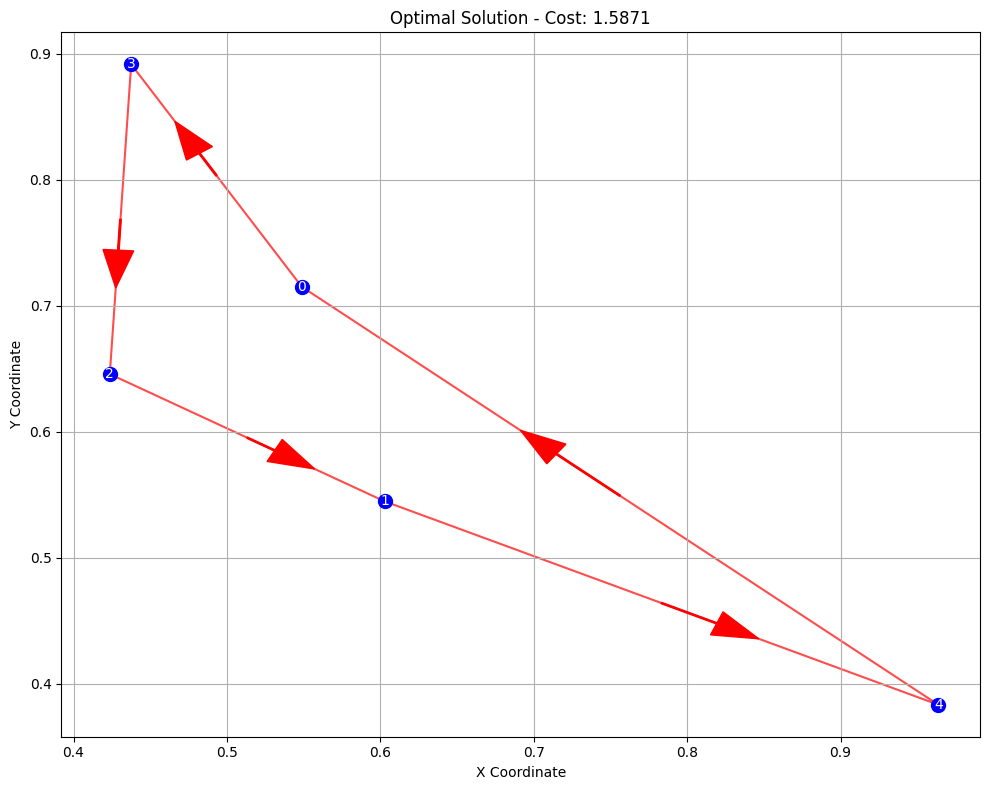

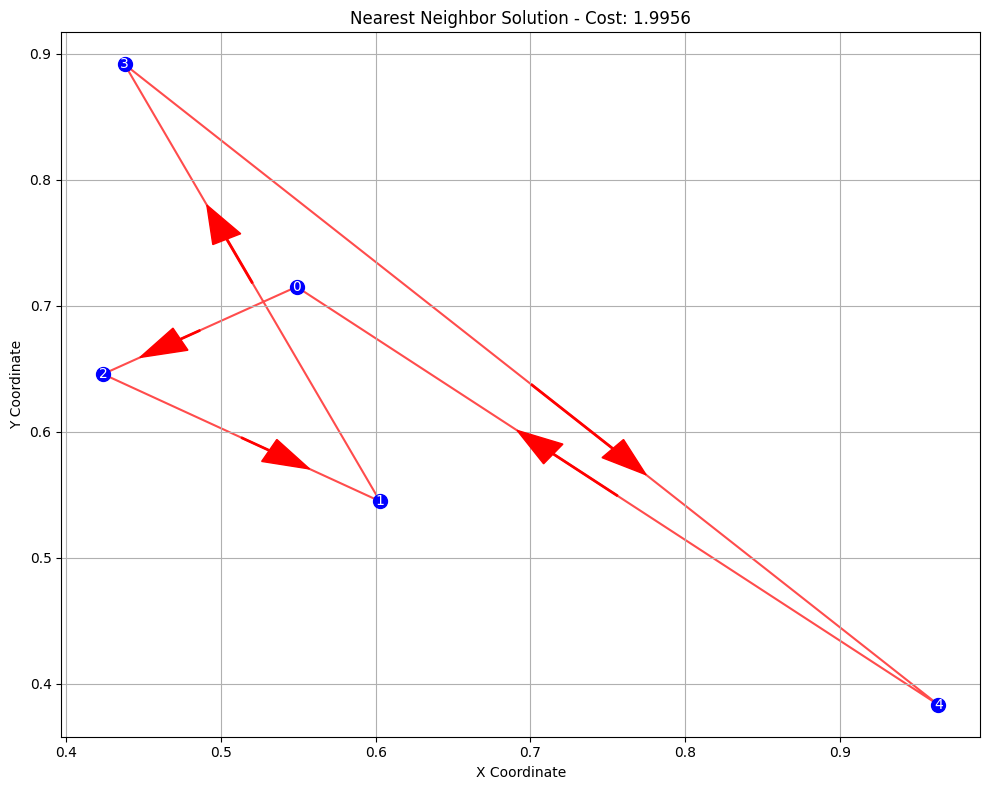

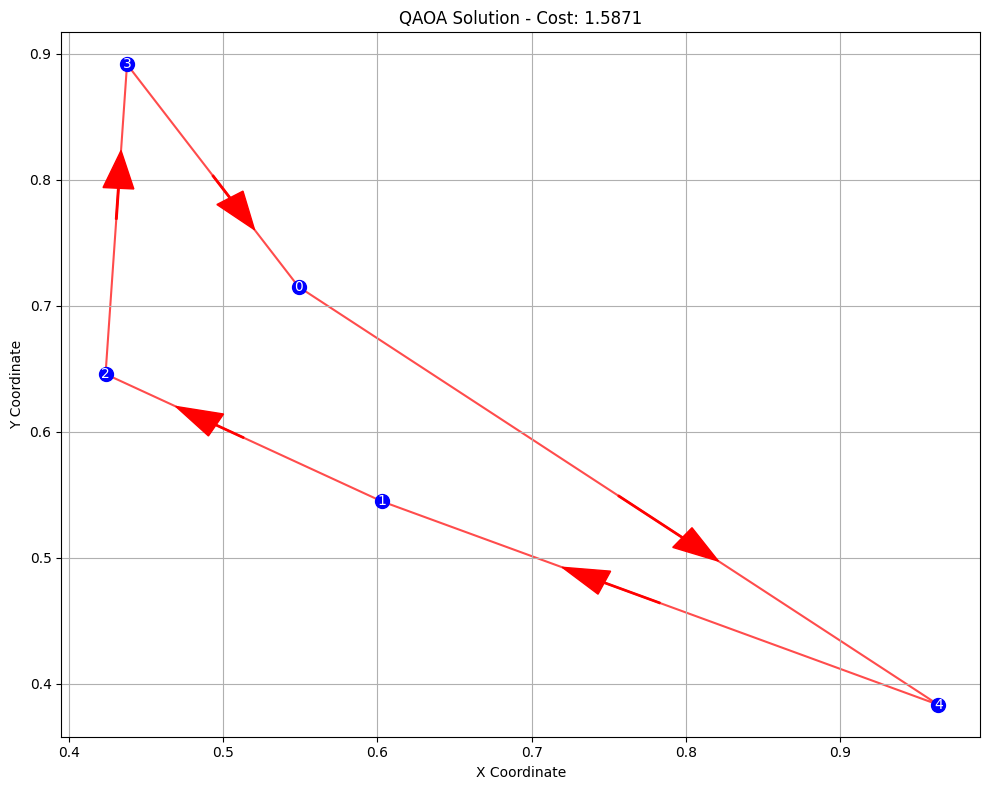

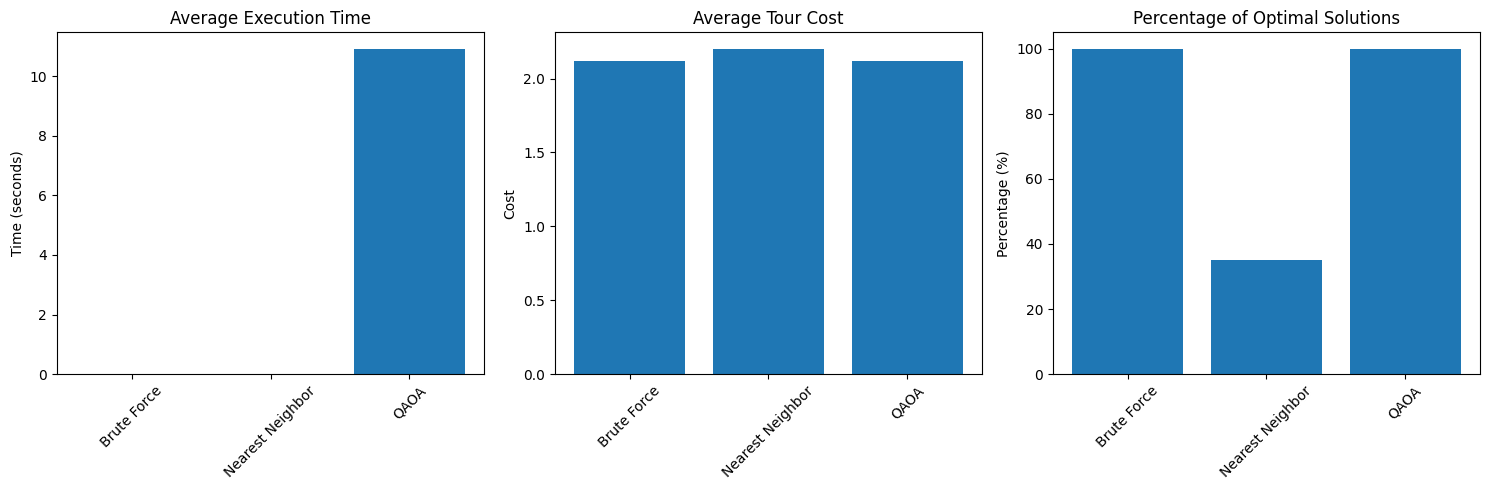

All visualizations saved successfully!


In [16]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import AerSimulator
import time
import pandas as pd
from tqdm import tqdm
import itertools
import math
from scipy.optimize import minimize

# Define a function to create a small TSP instance
def create_tsp_instance(n_cities=5, seed=None):
    """Create a random TSP instance with n_cities."""
    if seed is not None:
        np.random.seed(seed)
    
    # Generate random city coordinates
    cities = np.random.rand(n_cities, 2)
    
    # Calculate distances between cities
    distances = np.zeros((n_cities, n_cities))
    for i in range(n_cities):
        for j in range(i+1, n_cities):
            # Euclidean distance
            dist = np.sqrt(np.sum((cities[i] - cities[j])**2))
            distances[i, j] = distances[j, i] = dist
            
    return cities, distances

# Calculate TSP tour cost
def calculate_tour_cost(tour, distances):
    """Calculate the total cost of a TSP tour."""
    n_cities = len(tour)
    cost = 0
    
    for i in range(n_cities):
        if i < n_cities - 1:
            cost += distances[tour[i], tour[i+1]]
        else:
            cost += distances[tour[i], tour[0]]
    
    return cost

# Brute force solver for reference
def solve_tsp_bruteforce(distances):
    """Solve TSP using brute force (for small instances)."""
    n_cities = len(distances)
    cities = list(range(n_cities))
    
    best_cost = float('inf')
    best_tour = None
    
    # Start timing
    start_time = time.time()
    
    # For efficiency, we fix city 0 as the starting point
    for perm in itertools.permutations(cities[1:]):
        tour = [0] + list(perm)
        
        # Calculate cost
        cost = calculate_tour_cost(tour, distances)
        
        if cost < best_cost:
            best_cost = cost
            best_tour = tour
    
    # End timing
    end_time = time.time()
    execution_time = end_time - start_time
    
    return best_cost, best_tour, execution_time

# Nearest Neighbor solver
def solve_tsp_nearest_neighbor(distances):
    """Solve TSP using nearest neighbor algorithm."""
    n_cities = len(distances)
    
    # Start timing
    start_time = time.time()
    
    # Start from city 0
    current_city = 0
    tour = [current_city]
    unvisited = set(range(1, n_cities))
    
    # Build tour greedily
    while unvisited:
        # Find nearest unvisited city
        nearest_city = min(unvisited, key=lambda city: distances[current_city][city])
        tour.append(nearest_city)
        unvisited.remove(nearest_city)
        current_city = nearest_city
    
    # Calculate cost
    cost = calculate_tour_cost(tour, distances)
    
    # End timing
    end_time = time.time()
    execution_time = end_time - start_time
    
    return cost, tour, execution_time

# Quantum QAOA solver
def create_circuit_fixed_params(n_qubits, params):
    """Create a parameterized quantum circuit for TSP problem with fixed parameters"""
    qc = QuantumCircuit(n_qubits)
    
    # Initialize in superposition
    for i in range(n_qubits):
        qc.h(i)
    
    # Apply parameterized rotations and entanglement
    param_idx = 0
    
    # Two layers of rotations and entanglement
    for layer in range(2):
        # Rotation gates
        for q in range(n_qubits):
            qc.ry(params[param_idx], q)
            param_idx += 1
        
        # Entanglement
        for q in range(n_qubits-1):
            qc.cx(q, q+1)
        # Connect the last qubit to the first one (circular entanglement)
        if n_qubits > 1:
            qc.cx(n_qubits-1, 0)
    
    # Final rotation layer
    for q in range(n_qubits):
        if param_idx < len(params):
            qc.ry(params[param_idx], q)
            param_idx += 1
    
    # Add measurements
    qc.measure_all()
    
    return qc

def evaluate_tsp_solution(bitstring, distances):
    """Convert bitstring to TSP solution and evaluate it"""
    n_cities = len(distances)
    
    # For simplicity, interpret the first log2(n) bits as the first city's position,
    # the next log2(n) bits as the second city's position, etc.
    bits_per_city = max(1, math.ceil(math.log2(n_cities)))
    
    # Check if bitstring is long enough
    if len(bitstring) < n_cities * bits_per_city:
        return None, float('inf')
    
    # Extract positions for each city
    positions = {}
    for i in range(n_cities):
        start_idx = i * bits_per_city
        end_idx = min(start_idx + bits_per_city, len(bitstring))
        if start_idx >= len(bitstring):
            break
            
        # Convert binary to integer
        try:
            bin_val = bitstring[start_idx:end_idx]
            pos = int(bin_val, 2) % n_cities
            positions[i] = pos
        except ValueError:
            # If we can't convert to binary, assign a random position
            positions[i] = i
    
    # Handle duplicate positions or missing cities
    used_positions = set()
    ordered_cities = [-1] * n_cities
    
    # First, assign non-conflicting positions
    for city, pos in sorted(positions.items(), key=lambda x: x[1]):
        if pos not in used_positions and city < n_cities:
            ordered_cities[pos] = city
            used_positions.add(pos)
    
    # Assign remaining cities to empty positions
    unassigned_cities = [c for c in range(n_cities) if c not in [x for x in ordered_cities if x != -1]]
    empty_positions = [p for p in range(n_cities) if p not in used_positions]
    
    for city, pos in zip(unassigned_cities, empty_positions):
        ordered_cities[pos] = city
    
    # If there are still -1's in the order, replace with any unassigned cities
    remaining_cities = [c for c in range(n_cities) if c not in ordered_cities]
    for i in range(n_cities):
        if ordered_cities[i] == -1:
            if remaining_cities:
                ordered_cities[i] = remaining_cities.pop(0)
            else:
                # If no cities left, use a city that appears elsewhere (duplicate)
                ordered_cities[i] = ordered_cities[(i+1) % n_cities]
    
    # Calculate tour cost
    tour_cost = calculate_tour_cost(ordered_cities, distances)
    
    return ordered_cities, tour_cost

def solve_tsp_qaoa(distances, shots=1024):
    """Solve TSP using a quantum approach inspired by QAOA"""
    n_cities = len(distances)
    
    # Start timing
    start_time = time.time()
    
    # Number of qubits needed: using a binary encoding for each city's position in the tour
    bits_per_city = max(1, math.ceil(math.log2(n_cities)))
    n_qubits = n_cities * bits_per_city
    
    # Number of parameters for our parameterized circuit
    n_params = 2 * n_qubits + n_qubits  # Two layers of rotations + final layer
    
    # Initialize simulator
    simulator = AerSimulator()
    
    # Objective function for optimization
    def objective_function(params):
        # Create circuit with these parameters
        qc = create_circuit_fixed_params(n_qubits, params)
        
        # Run the circuit and get counts
        transpiled_qc = transpile(qc, simulator)
        result = simulator.run(transpiled_qc, shots=shots).result()
        counts = result.get_counts()
        
        # Evaluate solutions
        total_cost = 0
        total_count = 0
        min_cost = float('inf')
        
        for bitstr, count in counts.items():
            tour, cost = evaluate_tsp_solution(bitstr, distances)
            if tour is not None:
                total_cost += cost * count
                total_count += count
                min_cost = min(min_cost, cost)
        
        # Return average cost of valid solutions
        if total_count > 0:
            return total_cost / total_count
        else:
            return 1000.0  # Return a high cost if no valid solutions
    
    # Initial parameters
    initial_point = np.random.random(n_params) * 2 * np.pi
    
    # Use scipy's optimizer
    try:
        result = minimize(
            objective_function, 
            initial_point, 
            method='COBYLA',
            options={'maxiter': 50, 'disp': True}  # Use 50 iterations for demo
        )
        optimized_params = result.x
    except Exception as e:
        print(f"Optimization failed: {e}")
        # Use initial random parameters if optimization fails
        optimized_params = initial_point
    
    # Run final circuit with best parameters
    best_qc = create_circuit_fixed_params(n_qubits, optimized_params)
    transpiled_qc = transpile(best_qc, simulator)
    final_result = simulator.run(transpiled_qc, shots=1000).result()
    counts = final_result.get_counts()
    
    # Evaluate the results to find the best solution
    best_cost = float('inf')
    best_tour = None
    
    for bitstr, count in sorted(counts.items(), key=lambda x: x[1], reverse=True):
        tour, cost = evaluate_tsp_solution(bitstr, distances)
        if tour is not None and cost < best_cost:
            best_cost = cost
            best_tour = tour
    
    # If no valid solution found, use nearest neighbor as fallback
    if best_tour is None:
        cost, best_tour, _ = solve_tsp_nearest_neighbor(distances)
        best_cost = cost
    
    # End timing
    end_time = time.time()
    execution_time = end_time - start_time
    
    return best_cost, best_tour, execution_time, counts

# Visualize the TSP solution
def visualize_tsp_solution(cities, tour, title="TSP Solution Tour"):
    """Visualize the TSP solution."""
    plt.figure(figsize=(10, 8))
    
    # Plot cities
    x = cities[:, 0]
    y = cities[:, 1]
    plt.scatter(x, y, c='blue', s=100, zorder=2)
    
    # Label cities
    for i, (x_, y_) in enumerate(cities):
        plt.text(x_, y_, str(i), fontsize=10, ha='center', va='center', color='white')
    
    # Plot tour
    tour_points = np.array([cities[city] for city in tour])
    # Add the first city again to complete the tour
    tour_points = np.vstack([tour_points, tour_points[0]])
    plt.plot(tour_points[:, 0], tour_points[:, 1], 'r-', zorder=1, alpha=0.7)
    
    # Tour arrows
    for i in range(len(tour)):
        start = cities[tour[i]]
        if i < len(tour) - 1:
            end = cities[tour[i+1]]
        else:
            end = cities[tour[0]]
        
        # Calculate arrow direction
        dx = end[0] - start[0]
        dy = end[1] - start[1]
        # Draw arrow at the middle of the line
        mid_x = start[0] + dx/2
        mid_y = start[1] + dy/2
        plt.arrow(mid_x, mid_y, dx/10, dy/10, head_width=0.02, head_length=0.03, 
                  fc='red', ec='red', zorder=3)
    
    plt.title(title)
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.tight_layout()
    
    return plt.gcf()  # Return the figure for further handling

# Run benchmarks
def run_benchmarks(n_cities=5, n_trials=20):
    """Run benchmarks on TSP algorithms."""
    # Initialize result storage
    results = {
        'Trial': [],
        'Algorithm': [],
        'Tour_Cost': [],
        'Execution_Time': [],
        'Optimal': []
    }
    
    print(f"Running {n_trials} trials with {n_cities} cities...")
    
    # Run trials
    for trial in tqdm(range(n_trials)):
        cities, distances = create_tsp_instance(n_cities, seed=trial)
        
        # Get optimal solution with brute force
        print(f"Trial {trial+1}/{n_trials} - Running Brute Force...")
        bf_cost, bf_tour, bf_time = solve_tsp_bruteforce(distances)
        
        results['Trial'].append(trial)
        results['Algorithm'].append('Brute Force')
        results['Tour_Cost'].append(bf_cost)
        results['Execution_Time'].append(bf_time)
        results['Optimal'].append(True)  # Brute force is always optimal
        
        # Solve with Nearest Neighbor
        print(f"Trial {trial+1}/{n_trials} - Running Nearest Neighbor...")
        nn_cost, nn_tour, nn_time = solve_tsp_nearest_neighbor(distances)
        
        results['Trial'].append(trial)
        results['Algorithm'].append('Nearest Neighbor')
        results['Tour_Cost'].append(nn_cost)
        results['Execution_Time'].append(nn_time)
        # Check if nearest neighbor found optimal solution
        results['Optimal'].append(abs(nn_cost - bf_cost) < 1e-6)
        
        # Solve with QAOA approach
        print(f"Trial {trial+1}/{n_trials} - Running QAOA approach...")
        qa_cost, qa_tour, qa_time, qa_counts = solve_tsp_qaoa(distances)
        
        results['Trial'].append(trial)
        results['Algorithm'].append('QAOA')
        results['Tour_Cost'].append(qa_cost)
        results['Execution_Time'].append(qa_time)
        # Check if QAOA found optimal solution
        results['Optimal'].append(abs(qa_cost - bf_cost) < 1e-6)
        
        # Visualize first trial
        if trial == 0:
            print("\nResults for first trial:")
            print(f"Brute Force: Cost={bf_cost:.4f}, Time={bf_time:.6f}s")
            print(f"Nearest Neighbor: Cost={nn_cost:.4f}, Time={nn_time:.6f}s")
            print(f"QAOA: Cost={qa_cost:.4f}, Time={qa_time:.6f}s")
            
            # Save visualizations for presentation
            bf_fig = visualize_tsp_solution(cities, bf_tour, 
                                 title=f"Optimal Solution - Cost: {bf_cost:.4f}")
            bf_fig.savefig("brute_force_solution.png", dpi=300, bbox_inches='tight')
            
            nn_fig = visualize_tsp_solution(cities, nn_tour, 
                                 title=f"Nearest Neighbor Solution - Cost: {nn_cost:.4f}")
            nn_fig.savefig("nearest_neighbor_solution.png", dpi=300, bbox_inches='tight')
            
            qa_fig = visualize_tsp_solution(cities, qa_tour, 
                                title=f"QAOA Solution - Cost: {qa_cost:.4f}")
            qa_fig.savefig("qaoa_solution.png", dpi=300, bbox_inches='tight')
            
            # Print measurement statistics
            print("\nTop 5 measurement outcomes from QAOA approach:")
            sorted_counts = sorted(qa_counts.items(), key=lambda x: x[1], reverse=True)
            for i, (bitstring, count) in enumerate(sorted_counts[:5]):
                print(f"{bitstring}: {count} shots ({count/1000*100:.2f}%)")
    
    # Convert to DataFrame
    df = pd.DataFrame(results)
    
    # Calculate statistics
    stats = df.groupby('Algorithm').agg({
        'Tour_Cost': ['mean', 'min', 'max', 'std'],
        'Execution_Time': ['mean', 'min', 'max', 'std'],
        'Optimal': 'sum'
    })
    
    stats[('Optimal', '%')] = stats[('Optimal', 'sum')] / n_trials * 100
    
    # Print results
    print("\nBenchmark Results:")
    print(stats)
    
    # Create comparison plots
    plt.figure(figsize=(15, 5))
    
    # Execution time comparison
    plt.subplot(1, 3, 1)
    algs = df['Algorithm'].unique()
    time_means = [df[df['Algorithm'] == alg]['Execution_Time'].mean() for alg in algs]
    plt.bar(algs, time_means)
    plt.title('Average Execution Time')
    plt.ylabel('Time (seconds)')
    plt.xticks(rotation=45)
    
    # Tour cost comparison
    plt.subplot(1, 3, 2)
    cost_means = [df[df['Algorithm'] == alg]['Tour_Cost'].mean() for alg in algs]
    plt.bar(algs, cost_means)
    plt.title('Average Tour Cost')
    plt.ylabel('Cost')
    plt.xticks(rotation=45)
    
    # Optimality comparison
    plt.subplot(1, 3, 3)
    opt_percs = [stats.loc[alg, ('Optimal', '%')] for alg in algs]
    plt.bar(algs, opt_percs)
    plt.title('Percentage of Optimal Solutions')
    plt.ylabel('Percentage (%)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.savefig("algorithm_comparison.png", dpi=300, bbox_inches='tight')
    plt.show()
    
    return df, stats

# Create summary visualizations for presentation slides
def create_summary_visualizations(df, stats):
    """Create additional visualizations for presentation"""
    
    # Time comparison with logarithmic scale
    plt.figure(figsize=(10, 6))
    algs = df['Algorithm'].unique()
    time_means = [df[df['Algorithm'] == alg]['Execution_Time'].mean() for alg in algs]
    plt.bar(algs, time_means)
    plt.title('Average Execution Time (Log Scale)', fontsize=14)
    plt.ylabel('Time (seconds)', fontsize=12)
    plt.yscale('log')  # Logarithmic scale for better comparison
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12)
    
    # Add time values as text
    for i, t in enumerate(time_means):
        plt.text(i, t*1.1, f"{t:.6f}s", ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig("time_comparison_log.png", dpi=300, bbox_inches='tight')
    plt.close()
    
    # Cost ratio comparison (normalized to brute force)
    plt.figure(figsize=(10, 6))
    bf_cost = stats.loc['Brute Force', ('Tour_Cost', 'mean')]
    cost_ratios = [stats.loc[alg, ('Tour_Cost', 'mean')]/bf_cost for alg in algs]
    
    plt.bar(algs, cost_ratios)
    plt.title('Solution Quality (Ratio to Optimal)', fontsize=14)
    plt.ylabel('Cost Ratio (lower is better)', fontsize=12)
    plt.axhline(y=1.0, color='green', linestyle='--', alpha=0.7)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.xticks(fontsize=12)
    
    # Add ratio values as text
    for i, r in enumerate(cost_ratios):
        plt.text(i, r+0.01, f"{r:.4f}x", ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig("cost_ratio_comparison.png", dpi=300, bbox_inches='tight')
    plt.close()
    
    # Time vs Optimality trade-off
    plt.figure(figsize=(10, 6))
    opt_percs = [stats.loc[alg, ('Optimal', '%')] for alg in algs]
    
    # Create a scatter plot with algorithm names
    plt.scatter(time_means, opt_percs, s=100)
    
    # Add algorithm names as annotations
    for i, alg in enumerate(algs):
        plt.annotate(alg, (time_means[i], opt_percs[i]), 
                     xytext=(10, 5), textcoords='offset points', 
                     fontsize=12)
    
    plt.title('Time vs. Optimality Trade-off', fontsize=14)
    plt.xlabel('Average Execution Time (seconds)', fontsize=12)
    plt.ylabel('Percentage of Optimal Solutions', fontsize=12)
    plt.xscale('log')  # Log scale for time
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig("time_optimality_tradeoff.png", dpi=300, bbox_inches='tight')
    plt.close()
    
    # Create a summary table as an image
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.axis('tight')
    ax.axis('off')
    
    # Create table data
    table_data = [
        ['Algorithm', 'Avg. Time (s)', 'Avg. Cost', 'Optimal Solutions (%)', 'Cost Ratio'],
    ]
    
    for alg in algs:
        time_val = stats.loc[alg, ('Execution_Time', 'mean')]
        cost_val = stats.loc[alg, ('Tour_Cost', 'mean')]
        opt_val = stats.loc[alg, ('Optimal', '%')]
        ratio_val = cost_val / stats.loc['Brute Force', ('Tour_Cost', 'mean')]
        
        table_data.append([
            alg,
            f"{time_val:.6f}",
            f"{cost_val:.4f}",
            f"{opt_val:.1f}%",
            f"{ratio_val:.4f}x"
        ])
    
    table = ax.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)
    
    plt.tight_layout()
    plt.savefig("summary_table.png", dpi=300, bbox_inches='tight')
    plt.close()

if __name__ == "__main__":
    # Set parameters
    N_CITIES = 5         # Number of cities
    N_TRIALS = 20         # Number of trials
    
    # Run benchmarks
    df, stats = run_benchmarks(n_cities=N_CITIES, n_trials=N_TRIALS)
    
    # Create additional visualizations for presentation
    create_summary_visualizations(df, stats)
    
    print("All visualizations saved successfully!")

Running 20 trials with 5 cities...


  0%|                                                    | 0/20 [00:00<?, ?it/s]

Trial 1/20 - Running Brute Force...
Trial 1/20 - Running Nearest Neighbor...
Trial 1/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 1.791495E+00    MAXCV = 0.000000E+00
   X = 4.974555E+00   3.323145E+00   3.569129E+00   6.815695E+00   1.446333E+00
       5.474495E-01   1.270359E-01   5.231505E+00   4.889303E+00   5.466448E+00
       6.148840E+00   6.021261E+00   2.899560E+00   4.904209E+00   7.431401E-01
       4.020742E+00   9.007153E-01   6.935530E+00   3.278870E+00   3.605398E+00
       2.662252E+00   4.864654E+00   2.866077E+00   4.571576E+00   1.180598E-01
       4.880718E+00   3.845911E+00   3.876311E+00   5.929744E+00   4.284003E+00
       2.258855E+00   2.745953E+00   4.383346E+00   3.784078E-01   4.189419E+00
       4.213742E+00   1.321873E+00   8.100678E-01   1.981895E+00   2.285262E+00
       3.582652E+00   2.755815E+00   6.210136E+00   6.411665E-01   1.312411E+00

Results for first trial:
B

  5%|██▏                                         | 1/20 [00:11<03:44, 11.84s/it]


Top 5 measurement outcomes from QAOA approach:
100011000101001: 9 shots (0.90%)
110100100101000: 7 shots (0.70%)
100011000001001: 5 shots (0.50%)
100011011010001: 5 shots (0.50%)
110100011001000: 4 shots (0.40%)
Trial 2/20 - Running Brute Force...
Trial 2/20 - Running Nearest Neighbor...
Trial 2/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 1.871942E+00    MAXCV = 0.000000E+00
   X = 2.581990E+00   4.015581E+00   1.229538E+00   5.511081E+00   1.691477E-01
       5.217382E+00   2.462042E+00   3.372489E+00   7.568189E-01   1.177202E+00
       4.903659E+00   7.162053E+00   1.850372E+00   4.179511E+00   5.140256E+00
       5.488708E+00   3.622641E-01   1.742118E-01   8.833110E-01   5.491069E+00
       5.304421E-01   2.591459E+00   5.878100E+00   3.255208E+00   4.097582E+00
       1.783104E+00   4.291297E+00   4.854882E+00  -2.925220E-01   4.446662E+00
       6.104416E+00   4.544696E+00   1.574412E+00   4.

 10%|████▍                                       | 2/20 [00:22<03:25, 11.42s/it]

Trial 3/20 - Running Brute Force...
Trial 3/20 - Running Nearest Neighbor...
Trial 3/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 1.629349E+00    MAXCV = 0.000000E+00
   X = 3.322918E+00   4.328543E+00   7.876353E-01   3.189785E+00   1.045662E+00
       4.826682E+00   5.356946E+00   3.002227E+00   5.258837E+00   4.477797E-01
       3.050639E+00   2.733468E-01   2.595586E+00   5.058057E-01   5.761636E-01
       3.737833E+00   1.401186E+00   6.285782E-01   1.310442E+00   3.279571E+00
       2.929556E+00   1.172480E+00   3.939570E+00   2.870845E+00   4.283978E+00
       2.094656E+00   4.848027E+00   3.429016E+00   6.899830E-01   4.105941E+00
       5.851565E+00   3.120873E+00   6.593035E+00   3.158435E+00   3.547944E+00
       3.689017E+00   2.644840E+00   5.886714E+00   3.178203E+00   5.904375E+00
       3.097870E+00   3.086156E-01   2.077424E+00   6.484892E+00   2.472557E+00


 15%|██████▌                                     | 3/20 [00:33<03:09, 11.16s/it]

Trial 4/20 - Running Brute Force...
Trial 4/20 - Running Nearest Neighbor...
Trial 4/20 - Running QAOA approach...


 20%|████████▊                                   | 4/20 [00:44<02:55, 10.96s/it]


   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.572104E+00    MAXCV = 0.000000E+00
   X = 1.841647E-01   3.878801E+00   5.209519E+00   1.659649E+00   4.146256E+00
       3.711259E+00   1.154441E+00   3.374535E+00   2.727150E+00   3.610905E+00
       1.636402E+00   5.369610E+00   2.612579E+00   7.402845E-01   3.174925E+00
       4.786932E+00   1.788518E+00   1.227857E+00   2.411426E+00   5.810964E+00
       6.031844E+00   4.118422E+00   5.476513E+00   5.105949E+00   2.221136E+00
       5.365518E-01   4.042539E+00   3.458942E+00   2.095113E+00   1.142060E+00
       2.437613E+00   2.946392E+00   1.682470E+00   1.798641E+00   2.844070E+00
       5.363279E+00   4.835846E+00   1.570179E+00   1.686334E+00   2.781622E+00
       1.107725E+00   1.130913E+00   2.957132E+00   1.847464E-01   2.705607E+00
Trial 5/20 - Running Brute Force...
Trial 5/20 - Running Nearest Neighbor...
Trial 5/20 - Running QAOA approach...

   Return from subroutine 

 25%|███████████                                 | 5/20 [00:55<02:42, 10.85s/it]

Trial 6/20 - Running Brute Force...
Trial 6/20 - Running Nearest Neighbor...
Trial 6/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.414835E+00    MAXCV = 0.000000E+00
   X = 1.507312E+00   5.639757E+00   2.772828E+00   9.946902E-01   5.528807E+00
       1.722136E+00   2.602715E+00   1.860325E+00   3.950791E+00   3.643228E+00
       4.769466E+00   2.670191E+00   2.788734E+00   1.593342E+00   3.058145E+00
       9.058110E-01   2.040576E+00   6.056554E+00   6.033282E+00   1.183844E+00
       1.527226E-01   1.285260E+00   4.397247E+00   4.897835E+00   1.440929E-01
       3.629563E+00   1.031808E-02   4.238810E+00   4.019952E+00   6.192861E+00
       1.627958E+00   5.042237E+00   5.469407E+00   5.797807E+00   1.391231E-02
       2.949882E+00   6.166750E+00   2.506644E+00   5.112832E+00   4.433487E+00
       4.843419E+00   3.046912E+00   1.829133E-01   5.436569E-01   7.002850E-01


 30%|█████████████▏                              | 6/20 [01:05<02:30, 10.78s/it]

Trial 7/20 - Running Brute Force...
Trial 7/20 - Running Nearest Neighbor...
Trial 7/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.427115E+00    MAXCV = 0.000000E+00
   X = 3.702476E+00   4.678374E+00   3.327892E+00   3.890751E+00   4.126734E+00
       6.273235E+00   5.192689E+00   2.690676E+00   5.637957E+00   5.230993E+00
       1.685829E+00   5.521275E+00   4.679636E+00   5.719899E+00   4.187783E+00
       3.227042E+00   6.945679E-01   5.796552E+00   3.558922E+00   1.325930E+00
       5.530952E+00   6.177913E+00   2.784027E+00   4.182392E+00   4.791676E+00
       4.441702E+00   6.935468E+00   2.016091E+00   1.428588E+00   2.054980E+00
       5.747375E+00   5.675856E+00   2.296505E+00   6.047353E+00   2.774610E+00
       2.332324E+00   4.331308E+00   4.895532E-01   2.333241E+00   4.707581E+00
       4.419220E+00   1.334287E+00   7.181338E-01   2.338941E+00   1.815273E+00


 35%|███████████████▍                            | 7/20 [01:16<02:20, 10.79s/it]

Trial 8/20 - Running Brute Force...
Trial 8/20 - Running Nearest Neighbor...
Trial 8/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.872997E+00    MAXCV = 0.000000E+00
   X = 5.287019E+00   4.877755E+00   2.150887E+00   1.420038E+00   2.872742E+00
       5.642453E+00   1.309707E+00   2.697791E+00   6.904326E+00  -5.951288E-03
       3.712884E+00   5.859539E+00   1.212520E+00   3.375542E+00   5.550231E+00
       8.346422E-01   3.140890E+00   4.598620E+00   4.105330E+00   2.714744E+00
       2.311600E+00   2.887703E+00   2.338645E+00   2.996650E+00   2.127283E+00
       5.159612E+00   5.895817E+00   1.834760E+00   3.320100E+00   1.617511E+00
       2.817149E+00   3.359762E+00   3.993457E+00   2.320002E+00   2.789375E+00
       4.353767E+00   2.397587E+00   5.295169E+00   1.087588E+00   4.577607E+00
       2.385850E+00   2.455356E+00   3.809623E+00   3.220086E+00   2.469354E+00


 40%|█████████████████▌                          | 8/20 [01:27<02:08, 10.72s/it]

Trial 9/20 - Running Brute Force...
Trial 9/20 - Running Nearest Neighbor...
Trial 9/20 - Running QAOA approach...


 45%|███████████████████▊                        | 9/20 [01:37<01:57, 10.70s/it]


   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.630708E+00    MAXCV = 0.000000E+00
   X = 3.489408E+00   3.414195E+00   5.780848E+00   5.475981E+00   4.893577E+00
       2.677214E+00   1.816312E+00   6.118913E+00   2.097164E+00   1.374768E+00
       4.134863E-01   6.175558E+00   1.803341E+00   2.024007E+00   1.445747E+00
       1.412271E+00   2.473281E+00   6.630645E+00   2.170599E+00   6.187363E+00
       1.805288E-01   2.209700E+00   2.393635E+00   4.801360E+00   6.898679E+00
       2.008670E+00   2.717326E+00   1.697376E+00   5.033183E+00   5.010173E+00
       4.315928E-01   3.792810E+00   4.998742E+00   2.011132E-01   3.861663E+00
       4.964801E+00   6.211535E+00   3.669157E+00   2.444932E-01   2.804958E+00
       2.182323E+00   4.939907E+00   1.352882E+00   9.485732E-01   3.368694E+00
Trial 10/20 - Running Brute Force...
Trial 10/20 - Running Nearest Neighbor...
Trial 10/20 - Running QAOA approach...

   Return from subrouti

 50%|█████████████████████▌                     | 10/20 [01:48<01:46, 10.66s/it]

Trial 11/20 - Running Brute Force...
Trial 11/20 - Running Nearest Neighbor...
Trial 11/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 3.004957E+00    MAXCV = 0.000000E+00
   X = 4.306243E+00   5.990347E+00   2.480769E-02   3.218199E+00   5.105848E+00
       3.848615E+00   4.534922E+00   1.833911E+00   5.766545E+00   4.489812E+00
       3.408907E+00   1.893281E+00   2.345769E+00   4.235706E+00   2.776120E+00
       2.726990E+00   4.881544E+00   3.224143E+00   4.086566E+00   3.776439E+00
       5.059367E+00   3.277606E+00   5.709209E+00   2.005820E+00   5.683729E-01
       1.889354E+00   7.161849E-01   5.206758E+00   2.946583E-01   3.935078E+00
       3.440585E+00   5.147732E+00   1.250024E+00   5.383749E+00   2.209499E+00
       4.741591E+00   1.859582E+00   5.553937E+00   2.045250E+00   1.036825E+00
       2.466334E+00   5.872289E-01   5.159159E+00   9.497161E-01   2.413462E+00


 55%|███████████████████████▋                   | 11/20 [01:59<01:36, 10.68s/it]

Trial 12/20 - Running Brute Force...
Trial 12/20 - Running Nearest Neighbor...
Trial 12/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 3.037501E+00    MAXCV = 0.000000E+00
   X = 4.473165E+00   1.723891E+00   5.503113E+00   5.340030E+00   8.292761E-01
       3.962461E+00  -2.484407E-02   5.832540E-01   1.791705E+00   2.029177E+00
       4.673599E+00   5.845674E+00   2.019544E+00   1.751455E+00   6.715873E-01
       3.409227E-01   4.349045E+00   4.979278E+00   9.926375E-02   2.897333E+00
       3.531571E+00   6.381077E+00   4.106770E+00   3.659583E+00   3.231437E+00
       5.685715E+00   7.333740E+00   1.904293E+00   1.462552E+00   6.042331E+00
       3.848932E-01   3.323919E+00   2.925240E-01   1.718443E+00   1.468686E+00
       1.440783E+00   4.647901E+00   5.564418E+00   6.008566E+00   3.046799E+00
       3.607521E+00   2.185598E+00   8.575355E-01   2.707065E+00   4.342662E+00


 60%|█████████████████████████▊                 | 12/20 [02:09<01:25, 10.71s/it]

Trial 13/20 - Running Brute Force...
Trial 13/20 - Running Nearest Neighbor...
Trial 13/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 3.316339E+00    MAXCV = 0.000000E+00
   X = 2.839742E+00   4.811974E+00   5.898237E+00   5.246367E+00   1.067844E+00
       4.451053E+00   3.217145E+00   3.020393E+00   4.605433E+00   6.608353E-01
       4.734370E+00   1.009819E-02   7.861959E-01   7.092044E-01   3.003808E+00
       4.118301E+00   2.866893E+00   5.081849E+00   1.662287E+00   4.411492E+00
       4.316999E+00   1.792412E+00   1.945509E+00   6.024645E+00   3.873309E+00
       5.958926E+00   4.788761E+00   5.138098E+00   2.315658E+00   2.489094E+00
       2.398451E+00   6.089438E+00   1.018543E+00   5.860118E+00   3.640342E+00
       3.694854E+00   2.865563E+00   2.012431E+00   2.692097E+00   1.272649E+00
       3.665553E-01   4.510765E+00   5.019546E+00   1.148092E-01   1.824211E+00


 65%|███████████████████████████▉               | 13/20 [02:20<01:15, 10.76s/it]

Trial 14/20 - Running Brute Force...
Trial 14/20 - Running Nearest Neighbor...
Trial 14/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 1.948872E+00    MAXCV = 0.000000E+00
   X = 1.453006E-01   2.938775E+00   3.623096E-01   5.384008E+00   2.223880E+00
       5.306224E+00   2.651875E+00   3.204673E+00   1.093385E+00   2.074633E+00
       5.891360E+00   1.158321E+00   1.877109E+00   5.458329E+00   1.827146E-01
       2.880968E-01   3.726767E+00   5.428141E+00   1.067185E+00   4.519613E+00
       5.030993E+00   2.656710E-01   3.923262E+00   3.139647E+00   4.015422E+00
       5.940264E+00  -1.033351E-01   2.567197E+00   4.267598E+00   1.968679E+00
       1.634092E+00   4.297233E+00   5.707965E+00   1.487690E+00   2.857042E+00
       2.603524E+00   3.411086E+00   3.695585E+00   4.705489E+00   2.042824E-01
       4.028221E+00   3.145239E+00   2.059026E+00   2.351957E-01   1.299346E+00


 70%|██████████████████████████████             | 14/20 [02:31<01:04, 10.74s/it]

Trial 15/20 - Running Brute Force...
Trial 15/20 - Running Nearest Neighbor...
Trial 15/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.562110E+00    MAXCV = 0.000000E+00
   X = 6.083775E+00   3.251253E+00   3.235026E+00  -7.604468E-02   4.113424E+00
       1.136340E+00   5.787250E+00   3.013580E+00   5.733804E+00   4.766003E+00
       6.757241E+00   3.324251E-01   1.737683E+00   2.781036E+00   5.289884E+00
       1.421557E+00   4.225087E+00   4.092752E+00   1.101150E+00   1.995890E+00
       5.423108E+00   4.327709E-01   5.798791E+00   2.247170E-01   4.511279E+00
       4.435716E+00   2.453355E+00   5.685088E+00   3.867343E+00   1.094865E+00
       3.264959E+00   4.345971E+00   3.338192E+00   3.033247E-01   1.659587E+00
       6.218990E+00   1.562737E+00   2.758735E+00   4.254821E+00   5.917648E+00
       1.011256E+00   1.326958E+00   3.093985E-01   9.799187E-01   6.035432E+00


 75%|████████████████████████████████▎          | 15/20 [02:41<00:53, 10.68s/it]

Trial 16/20 - Running Brute Force...
Trial 16/20 - Running Nearest Neighbor...
Trial 16/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.041964E+00    MAXCV = 0.000000E+00
   X = 6.966999E+00   1.565907E+00   4.341682E+00   6.482882E+00   5.022186E+00
       1.285868E+00   9.419667E-01   1.568198E-01   1.221711E-01   1.128647E+00
       6.072026E+00   2.293993E+00   5.793468E+00   4.125350E+00   3.077073E+00
       6.966058E+00   4.365383E-01   2.788576E+00   7.210884E-01   3.257713E+00
       1.873053E+00   3.164014E+00   5.193771E+00   3.330364E+00   3.636262E+00
       3.942312E+00   2.562334E+00   2.333426E+00   3.486220E+00   3.614917E+00
       4.255989E-01   1.376663E+00   4.786833E-01   5.464877E+00   1.624636E-01
       3.061026E+00   6.117157E-01   1.251031E+00   3.951865E+00   2.557726E+00
       5.831418E+00   2.028392E+00   9.045360E-01   3.963284E+00   2.069199E+00


 80%|██████████████████████████████████▍        | 16/20 [02:52<00:42, 10.71s/it]

Trial 17/20 - Running Brute Force...
Trial 17/20 - Running Nearest Neighbor...
Trial 17/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.677052E+00    MAXCV = 0.000000E+00
   X = 3.378933E+00   3.322239E-01   4.802077E+00   1.278304E+00   1.889594E+00
       2.142834E+00   4.712544E+00   3.192563E+00   1.655631E+00   3.075525E+00
       1.037812E+00   6.041813E+00   4.937402E+00   2.925535E+00   3.008411E+00
       5.236275E-01   4.701209E+00   3.387529E+00   5.851303E+00   4.930845E+00
       1.465385E+00   4.078204E+00   3.209896E-01   5.321247E+00   2.722979E+00
       2.839313E+00   4.094407E+00   4.248872E+00   1.635553E+00  -3.066696E-03
       4.789101E+00   5.077782E+00   8.402993E-01   3.608556E+00   2.101550E+00
       2.474107E+00   1.166186E+00   1.647273E+00   6.055660E+00   1.284847E+00
       3.243625E+00   5.177809E-02   3.820544E+00   1.199872E+00   4.592194E+00


 85%|████████████████████████████████████▌      | 17/20 [03:03<00:32, 10.73s/it]

Trial 18/20 - Running Brute Force...
Trial 18/20 - Running Nearest Neighbor...
Trial 18/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 2.434031E+00    MAXCV = 0.000000E+00
   X = 5.941903E+00   3.772719E-01   5.428937E+00   5.512179E+00   3.216593E-01
       5.099267E+00   3.466756E+00   3.754286E+00   3.038100E+00   1.778067E+00
       1.870666E+00   4.528065E+00   3.488439E+00   4.955553E+00   3.629415E+00
       1.904175E+00   1.948175E+00   1.347092E+00   4.511561E+00   1.836684E+00
       1.248933E+00   5.223614E+00   4.568793E+00   5.173559E-01   3.424327E+00
       9.987672E-01   4.252223E+00   7.443832E-01   3.795993E+00   5.579358E+00
       5.009381E+00   1.427123E+00   6.036808E+00   4.141910E+00   4.516203E+00
       4.672031E+00   5.577812E+00   8.416055E-01   4.881875E+00   5.265256E+00
       5.210676E+00   1.831988E-01   2.452795E+00   2.747335E+00   3.271247E+00


 90%|██████████████████████████████████████▋    | 18/20 [03:14<00:21, 10.79s/it]

Trial 19/20 - Running Brute Force...
Trial 19/20 - Running Nearest Neighbor...
Trial 19/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 3.000964E+00    MAXCV = 0.000000E+00
   X = 3.610226E+00   5.256360E+00   4.588009E+00   1.144989E+00   6.508356E-01
       2.918240E+00   5.425203E+00   5.093379E+00   1.174946E+00   3.831259E+00
       4.354364E+00   3.231017E+00   4.899071E+00   5.969893E+00   1.333600E+00
       5.946662E+00   3.222956E+00   4.505547E+00   1.501791E+00   5.330521E+00
       2.270218E+00   2.053221E+00   1.920859E+00   5.231908E+00   4.836278E+00
       1.119721E+00   5.505318E+00   5.041349E+00   3.206909E+00   3.381026E+00
      -1.158601E-02   4.258263E+00   3.216816E+00   2.970010E-01   7.472495E-02
       1.721626E+00   6.146560E+00   1.170078E+00   6.530498E-01   1.190269E+00
       3.362088E+00   4.515540E+00   6.258797E-01   5.367586E+00   5.913875E+00


 95%|████████████████████████████████████████▊  | 19/20 [03:25<00:10, 10.84s/it]

Trial 20/20 - Running Brute Force...
Trial 20/20 - Running Nearest Neighbor...
Trial 20/20 - Running QAOA approach...

   Return from subroutine COBYLA because the MAXFUN limit has been reached.

   NFVALS =   50   F = 3.165614E+00    MAXCV = 0.000000E+00
   X = 1.356686E+00   3.449641E+00   3.427854E+00   2.470743E+00   7.145605E-01
       3.139452E+00   9.557254E-01   3.346965E+00   2.431635E+00   4.324889E+00
       2.343170E+00   5.944899E+00   4.884284E+00   3.820392E+00   3.865617E+00
       4.040010E+00   1.686932E+00   4.713370E+00   1.802209E+00   4.457141E+00
       1.407067E+00   4.334509E+00   3.469373E+00   3.479794E+00   3.177304E+00
       2.084559E+00   3.405063E+00   3.252745E-01   5.187131E+00   4.467766E+00
       2.775108E-01   4.808934E-01   6.499261E-02   6.247401E+00   3.766417E+00
       1.129332E+00   2.289457E+00   5.427646E+00   2.829039E+00   6.103296E+00
       8.523755E-01   4.496715E+00   5.786489E+00   5.877068E+00   5.882965E+00


100%|███████████████████████████████████████████| 20/20 [03:36<00:00, 10.82s/it]



Benchmark Results:
                 Tour_Cost                               Execution_Time  \
                      mean       min       max       std           mean   
Algorithm                                                                 
Brute Force       2.121912  1.294661  2.662013  0.420285       0.000072   
Nearest Neighbor  2.202468  1.337519  2.769998  0.423575       0.000020   
QAOA              2.121912  1.294661  2.662013  0.420285      10.761290   

                                                 Optimal         
                        min        max       std     sum      %  
Algorithm                                                        
Brute Force        0.000047   0.000084  0.000008      20  100.0  
Nearest Neighbor   0.000013   0.000027  0.000003       7   35.0  
QAOA              10.546428  11.123760  0.159893      20  100.0  


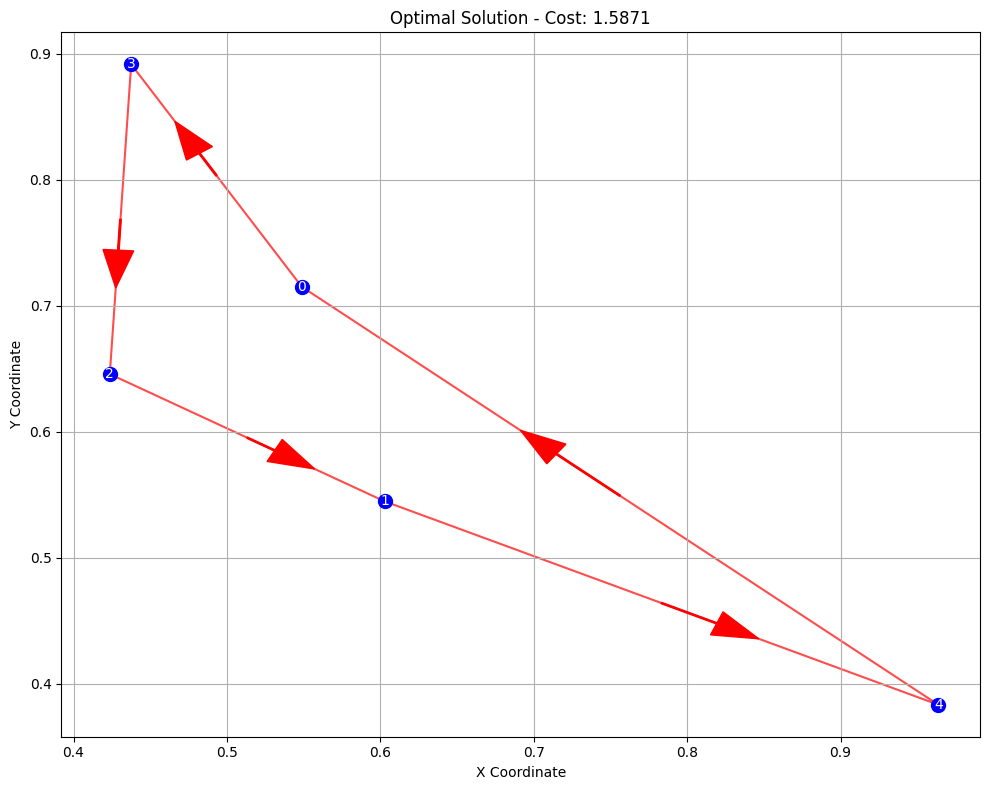

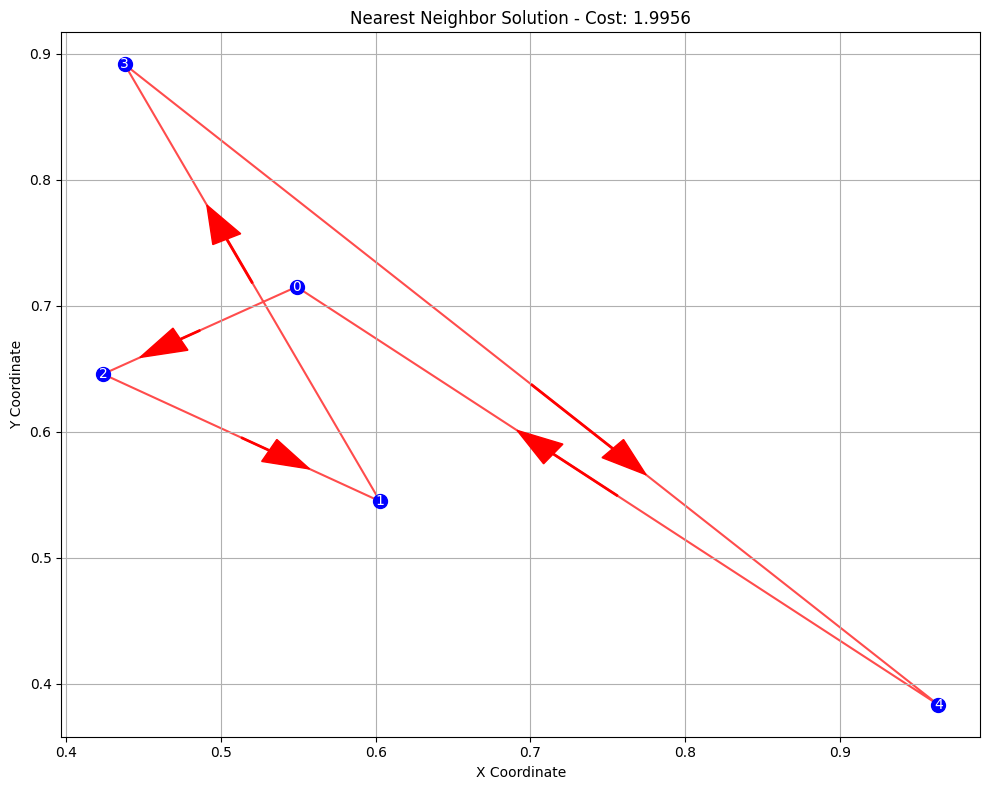

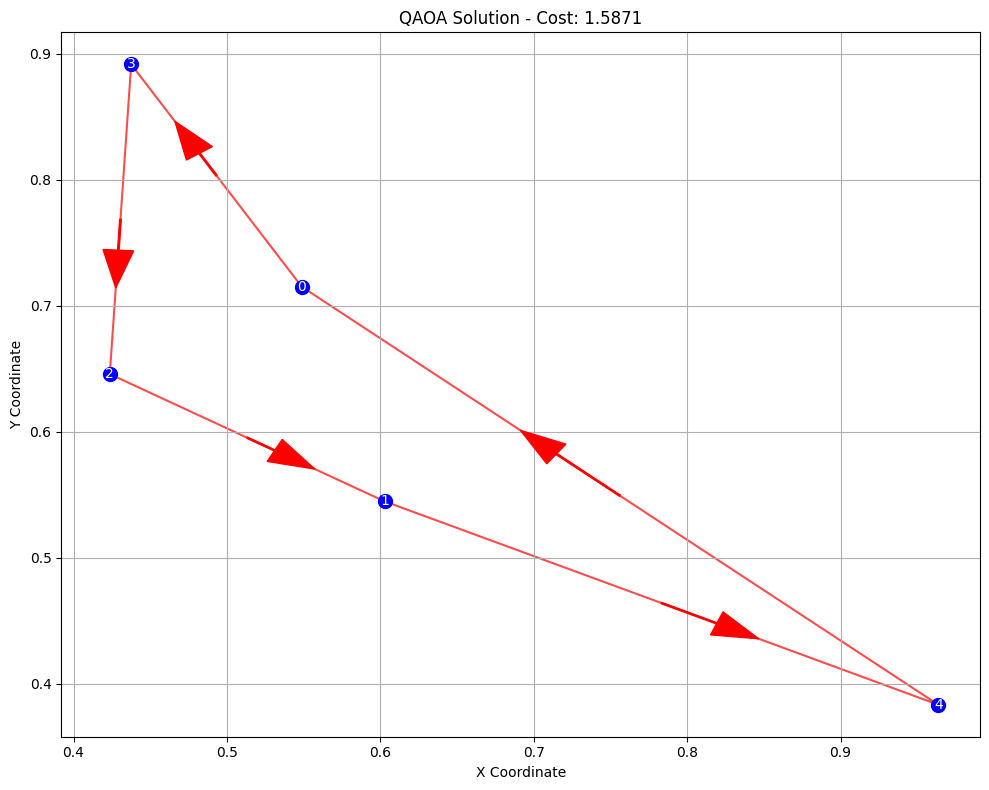

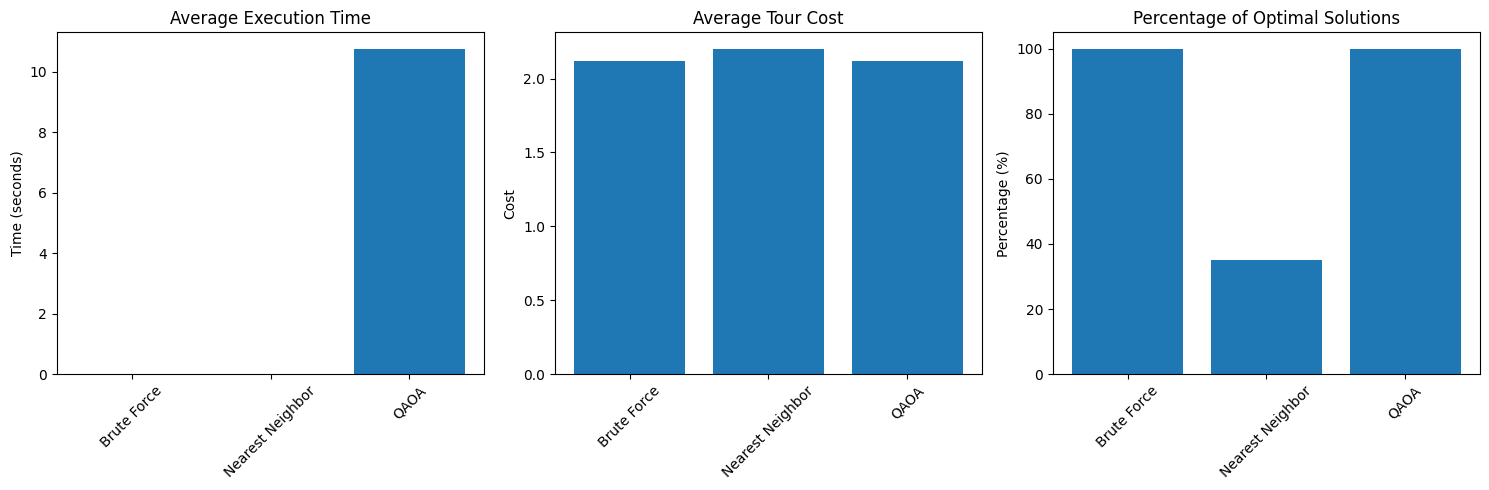

Generating individual visualization files for presentation...
All visualization files saved successfully!
Files ready for download:
  - 1_execution_time.png
  - 2_execution_time_log.png
  - 3_tour_cost.png
  - 4_cost_ratio.png
  - 5_optimal_percentage.png
  - 6_time_optimality_tradeoff.png
  - 7_summary_table.png


In [17]:
# Add this function to your existing code
def save_comparison_visualizations(df, stats):
    """
    Create and save individual visualization graphs that can be downloaded for presentations
    """
    print("Generating individual visualization files for presentation...")
    
    # Get unique algorithms
    algs = df['Algorithm'].unique()
    
    # 1. Create and save execution time comparison
    plt.figure(figsize=(10, 6))
    time_means = [df[df['Algorithm'] == alg]['Execution_Time'].mean() for alg in algs]
    
    # Create bar chart
    plt.bar(algs, time_means, color=['blue', 'green', 'purple'])
    plt.title('Average Execution Time', fontsize=14)
    plt.ylabel('Time (seconds)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add time values as text
    for i, t in enumerate(time_means):
        plt.text(i, t*1.1, f"{t:.6f}s", ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig("1_execution_time.png", dpi=300, bbox_inches='tight')
    plt.close()
    
    # 2. Create and save logarithmic time comparison
    plt.figure(figsize=(10, 6))
    plt.bar(algs, time_means, color=['blue', 'green', 'purple'])
    plt.title('Average Execution Time (Log Scale)', fontsize=14)
    plt.ylabel('Time (seconds)', fontsize=12)
    plt.yscale('log')  # Logarithmic scale
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add time values as text
    for i, t in enumerate(time_means):
        plt.text(i, t*1.1, f"{t:.6f}s", ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig("2_execution_time_log.png", dpi=300, bbox_inches='tight')
    plt.close()
    
    # 3. Create and save cost comparison
    plt.figure(figsize=(10, 6))
    cost_means = [df[df['Algorithm'] == alg]['Tour_Cost'].mean() for alg in algs]
    
    plt.bar(algs, cost_means, color=['blue', 'green', 'purple'])
    plt.title('Average Tour Cost', fontsize=14)
    plt.ylabel('Cost (Distance)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add cost values as text
    for i, c in enumerate(cost_means):
        plt.text(i, c + 0.02, f"{c:.4f}", ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig("3_tour_cost.png", dpi=300, bbox_inches='tight')
    plt.close()
    
    # 4. Create and save cost ratio comparison
    plt.figure(figsize=(10, 6))
    bf_cost = stats.loc['Brute Force', ('Tour_Cost', 'mean')]
    cost_ratios = [stats.loc[alg, ('Tour_Cost', 'mean')]/bf_cost for alg in algs]
    
    plt.bar(algs, cost_ratios, color=['blue', 'green', 'purple'])
    plt.title('Solution Quality (Ratio to Optimal)', fontsize=14)
    plt.ylabel('Cost Ratio (lower is better)', fontsize=12)
    plt.axhline(y=1.0, color='green', linestyle='--', alpha=0.7)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add ratio values as text
    for i, r in enumerate(cost_ratios):
        plt.text(i, r+0.01, f"{r:.4f}x", ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig("4_cost_ratio.png", dpi=300, bbox_inches='tight')
    plt.close()
    
    # 5. Create and save optimality percentage
    plt.figure(figsize=(10, 6))
    opt_percs = [stats.loc[alg, ('Optimal', '%')] for alg in algs]
    
    plt.bar(algs, opt_percs, color=['blue', 'green', 'purple'])
    plt.title('Percentage of Optimal Solutions', fontsize=14)
    plt.ylabel('Percentage (%)', fontsize=12)
    plt.ylim(0, 105)  # Set y-axis limit to show up to 100%
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    
    # Add percentage values as text
    for i, p in enumerate(opt_percs):
        plt.text(i, p+2, f"{p:.1f}%", ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.savefig("5_optimal_percentage.png", dpi=300, bbox_inches='tight')
    plt.close()
    
    # 6. Create and save time vs optimality trade-off
    plt.figure(figsize=(10, 6))
    
    # Create a scatter plot with algorithm names
    plt.scatter(time_means, opt_percs, s=100, c=['blue', 'green', 'purple'])
    
    # Add algorithm names as annotations
    for i, alg in enumerate(algs):
        plt.annotate(alg, (time_means[i], opt_percs[i]), 
                     xytext=(10, 5), textcoords='offset points', 
                     fontsize=12)
    
    plt.title('Time vs. Optimality Trade-off', fontsize=14)
    plt.xlabel('Average Execution Time (seconds)', fontsize=12)
    plt.ylabel('Percentage of Optimal Solutions', fontsize=12)
    plt.xscale('log')  # Log scale for time
    plt.grid(True)
    
    plt.tight_layout()
    plt.savefig("6_time_optimality_tradeoff.png", dpi=300, bbox_inches='tight')
    plt.close()
    
    # 7. Create a summary table as an image
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.axis('tight')
    ax.axis('off')
    
    # Create table data
    table_data = [
        ['Algorithm', 'Avg. Time (s)', 'Avg. Cost', 'Optimal Solutions (%)', 'Cost Ratio'],
    ]
    
    for alg in algs:
        time_val = stats.loc[alg, ('Execution_Time', 'mean')]
        cost_val = stats.loc[alg, ('Tour_Cost', 'mean')]
        opt_val = stats.loc[alg, ('Optimal', '%')]
        ratio_val = cost_val / stats.loc['Brute Force', ('Tour_Cost', 'mean')]
        
        table_data.append([
            alg,
            f"{time_val:.6f}",
            f"{cost_val:.4f}",
            f"{opt_val:.1f}%",
            f"{ratio_val:.4f}x"
        ])
    
    table = ax.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1, 1.5)
    
    plt.tight_layout()
    plt.savefig("7_summary_table.png", dpi=300, bbox_inches='tight')
    plt.close()
    
    print("All visualization files saved successfully!")
    print("Files ready for download:")
    print("  - 1_execution_time.png")
    print("  - 2_execution_time_log.png")
    print("  - 3_tour_cost.png")
    print("  - 4_cost_ratio.png")
    print("  - 5_optimal_percentage.png")
    print("  - 6_time_optimality_tradeoff.png")
    print("  - 7_summary_table.png")

# Now modify your main code to call this function
if __name__ == "__main__":
    # Set parameters
    N_CITIES = 5        # Number of cities
    N_TRIALS = 20         # Number of trials
    
    # Run benchmarks
    df, stats = run_benchmarks(n_cities=N_CITIES, n_trials=N_TRIALS)
    
    # Save visualization files for easy download
    save_comparison_visualizations(df, stats)